In [1]:
#@markdown instalacion paqutes
package = ['boto3','es_lemmatizer','pyodbc','prince',
           'pyLDAvis==2.1.2','gensim']
f= open("paquetes.txt","w+")

def install_txt(package):
  f= open("paquetes.txt","w+")
  for i in package:
    print(i)
    

    try:
        __import__(i)
        print('ya instalado {}'.format(i))
    except ImportError:
        # main(['install', package]) 
        f.write("{} \r\n".format(i))
        print('No instalado {}'.format(i))


install_txt(package)
!pip install -r paquetes.txt  

boto3
ya instalado boto3
es_lemmatizer
ya instalado es_lemmatizer
pyodbc
ya instalado pyodbc
prince
ya instalado prince
pyLDAvis==2.1.2
No instalado pyLDAvis==2.1.2
gensim


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


ya instalado gensim


#**Librerias**

In [2]:
#Librerias
import re
import numpy as np
import pandas as pd
import pandas_profiling
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import unicodedata
from es_lemmatizer import lemmatize
import spacy
import re
import pyodbc
import prince
import os
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import re #expresiones regulares
import itertools
from collections import Counter 
import seaborn as sns
import matplotlib as mpl
plt.style.use('ggplot')
sns.set_context("talk")
import datetime
import dateutil

#Librerias de visualizacion dinámica
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud
from pprint import pprint #Manipulacion de datos

#LDA MODEL FOR OBSERVACIONES
#quitar mas profundamente stop_words
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import unicodedata
import tqdm
import spacy.cli
from spacy.lang.es.stop_words import STOP_WORDS 
#descargamos los modelos
from nltk.corpus import stopwords
nltk.download('stopwords')

nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
spacy.cli.download("es_core_news_md")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
✔ Download and installation successful
You can now load the model

In [3]:
#@title Librerías modelo de LDA
## APLLY LDA MODEL TO OBSERVACIONES
#Gensim para modelado de temas, indexación de documentos y recuperación de similitudes con grandes corpus
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#Spacy para la lemmatization
import spacy
# Herramientas de graficado
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
# Habilitado de logging para gensim (opcional)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [4]:
#@title Librerías  modelo de Word2Vec
#word2vec modelo de EMBEDDING
#word2vec
from gensim.models import word2vec
import multiprocessing
from gensim.models import Word2Vec
from collections import defaultdict 
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
from pylab import rcParams
from google.colab import widgets

#**Rutas**

In [5]:
#Rutas en Drive colab
os.getcwd()

'/content'

In [6]:

Campaña_P  = "/content/Modelo Analítico PCP - Beneficio Educativo.xlsx"
nombres = "/content/drive/MyDrive/Ecopetro/Estefania/nombres_apellidos.txt"

In [7]:
# os.chdir('/content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Causación de facturas _Cockpit.')
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Consultas_retenciones_aplicadas
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Endoso_de_facturas
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Información_y_Seguimiento_a_usuarios_en_página_WEB_Proveedores
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Pagos_bloqueados
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Radicación_de_facturas
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Retención_en_Garantía
os.chdir('/content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Endoso_de_facturas')
os.getcwd()

'/content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Endoso_de_facturas'

#**Funciones**

In [8]:
# CONEXION A SERVIDOR ###################################################################################
# def Conexion():
#     server = '172.27.48.148'
#     #database = 'bdcmp_NuevaEpsCrm' 
#     username = 'CienciaDatos' 
#     password = 'C13nc1aD47*5'  
#     cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';UID='+username+';PWD='+ password)
#     cursor = cnxn.cursor()
#     return cnxn


# DEFINICION DE PICOS Y FECHAS ##################################################################################
##Se definen fechas para realizar los respectivos filtros 
##cuando se extraiga la información correspondiente desde el servidor

def fechas(df_Tipo_OF):
    df_OF = df_Tipo_OF.astype(str).replace('NaT','20200101')
#######Operaciones financieras
    df_OF ['fecha_ini_1'] = df_OF['Picos de demanda  1'].replace(regex=r'-', value = '').replace('0','20200101')
    df_OF ['fecha_fin_1'] = ['20210401','20210301','20210301','20210301', '20210301', '20210301', '20210401']
    df_OF ['fecha_ini_2'] = df_OF['Picos de demanda  2'].replace(regex=r'-', value = '').replace('0','20200101')
    df_OF ['fecha_fin_2'] = ['20210501', '20210501', '20200101', '20210501', '20200101', '20210501', '20201001']
    df_OF ['fecha_ini_3'] = df_OF['Picos de demanda  3'].replace(regex=r'-', value = '').replace('0','20200101')
    df_OF ['fecha_fin_3'] = ['20210601', '20200101', '20200101', '20210601', '20200101', '20200101', '20210101']
    
    return df_OF  

## EXTRACCIÓN ########################################################################################################

def Extraccion(df_fechas, df_General, picos):
    #df_fechas : Nombre de la tabla con las tipologias seleccionadas y las fechas definidas correspondientes (con la función de fechas)
    #df_general : Nombre de tabla para cada campaña sin las fechas definidas 
    #picos : Número máximo de picos que se analizan [en OF son 2, en P son 3]
    
    query_base = "SELECT * FROM [172.27.90.50].[Ecopetrol_Reporting].[dbo].[Tbl_Ecopetrol_ResultadoBackOffice] "
    
    i = 0 
    cnxn = Conexion()
    query = "WHERE ([fgs_Nivel3] = '"+ df_fechas['Nivel 3'][i] + "') AND ([fgs_FechaInicio] BETWEEN '" + df_fechas['fecha_ini_1'][i]+ "' AND '" + df_fechas['fecha_fin_1'][i] +"')"  
    query_completa = query_base + query
    df_inicial = pd.read_sql(query_completa, cnxn)

    for j in range(1,picos+1):
        df_General["Datos_Pico_"+str(j)] = 0
        for i in range(0,len(df_fechas['Campaña'])):
            cnxn = Conexion()
            query = "WHERE ([fgs_Nivel3] = '"+ df_fechas['Nivel 3'][i] + "') AND ([fgs_FechaInicio] BETWEEN '" + df_fechas["fecha_ini_"+str(j)][i]+ "' AND '" + df_fechas["fecha_fin_"+str(j)][i] +"')"  
            query_completa = query_base + query
            df = pd.read_sql(query_completa, cnxn)
            df_total = pd.concat([df_inicial,df]).drop_duplicates()
            df_inicial = df_total
            df_General["Datos_Pico_"+str(j)][i] = df.shape[0] 
    print('Total de registros:', df_inicial.shape[0])
    print('Total de columnas:', df_inicial.shape[1])
            
    return df_total,df_General                 

# VALORES FALTANTES ###############################################################################################################################################################################################

def Valores_Faltantes(df, porcentaje):
    Faltantes = df.isnull().sum()
    df_Faltantes = pd.DataFrame({'Nombre_Columnas':Faltantes.index, 'Total_Vacios':Faltantes.values})#[df_Faltantes['Total_Vacios'] != 0]
    df_Faltantes = df_Faltantes[df_Faltantes['Total_Vacios'] != 0]

    df_Faltantes['Porcentaje_vacio'] = ((df_Faltantes['Total_Vacios']/df.shape[0])*100).round(2)
    df_Faltantes['Columna_vacia'] = 'NO'
    df_Faltantes.loc[df_Faltantes['Total_Vacios'] == df.shape[0], 'Columna_vacia'] = 'SI'
    
    print('Total columnas con valores faltantes :', df_Faltantes.shape[0])
    print('Total columnas vacias :', df_Faltantes[df_Faltantes['Columna_vacia'] == 'SI'].Columna_vacia.count())
    print('Total columnas no vacias con mas del ' + str(porcentaje) + '% de valores faltantes :', df_Faltantes[(df_Faltantes['Porcentaje_vacio'] >= porcentaje) & (df_Faltantes['Columna_vacia'] == 'NO') ].Columna_vacia.count())
    #print('Total columnas no vacias con menos del ' + str(porcentaje) + '% de valores faltantes :', df_Faltantes[(df_Faltantes['Porcentaje_vacio'] >= porcentaje) & (df_Faltantes['Columna_vacia'] == 'NO') ].Columna_vacia.count())
    
    return df_Faltantes

# ELIMINAR COLUMNAS##############################################################################################

#para eliminar columnas seleccionadas
def Eliminar_columnas(df, lista_columnas):
    df_drop = df.drop(columns = lista_columnas)
    print ('Cantidad de columnas iniciales : ', df.shape[1])
    print ('Cantidad despues de eliminar : ', df_drop.shape[1] )
    return df_drop
### elimincacion 100 valores nulos, cardinalida100, cardinalidad 1
def eliminacion_columnas(tabla):
  cardinalidad100 = tabla[tabla['% de valores diferentes']==100]
  cardinalidad1 = tabla[tabla['# de valores diferentes']==1]
  vacios = tabla[tabla['% de datos nulos']==100]
  variables_eliminar=vacios.index.tolist()+cardinalidad1.index.tolist()+cardinalidad100.index.tolist()# no aportan informacion
  print('numero de variables a eliminar : {}'.format(len(variables_eliminar)))
  return variables_eliminar
# columnas duplicadas
def columnas_dup(df):
    df_dup = df.T.duplicated().T
    return df_dup
#Para eliminar columnas duplicadas
def columnas_nodup(df):
    print ('Total de columnas antes de eliminar dup: ', df.shape[1])
    df_sindup = df.T.drop_duplicates().T
    print ('Total de columnas duplicadas : ', df.shape[1] - df_sindup.shape[1])
    print ('Total de columnas no duplicadas:', df_sindup.shape[1])
    return df_sindup    

def mytable(data):
    nulls = pd.DataFrame(data.isnull().sum()/data.shape[0]*100, columns=['% de datos nulos'])
    ceros = pd.DataFrame((data==0).sum()/data.shape[0]*100, columns=['% de ceros'])
    tipo = pd.DataFrame(data.dtypes,columns=['Tipo de datos'])
    val = pd.DataFrame(data.nunique(),columns=['# de valores diferentes'])
    valpor = pd.DataFrame(data.nunique()/data.shape[0]*100,columns=['% de valores diferentes'])
    mis_val_table = pd.concat([nulls, ceros,tipo, val, valpor], axis=1)
    return mis_val_table

def creacion_tabla(x):
  tabla_x = mytable(x)
  print(x.shape)
  return tabla_x


def nonum(x):
 try:
   int(x)
   sal = False
 except:
    sal = True
 return sal 


def isnum(x):
 try:
   int(x)
   sal = True
 except:
    sal = False
 return sal 

def solo_num(x):
  try:
    sal = float(x)
  except:
    sal = np.nan
  return sal 
def creacion_tabla(x):
  tabla_x = mytable(x)
  print(x.shape)
  return tabla_x





#esta funcion quita stop words de cada una de las filas
def text_rows(texto, StopWords):
    texto = texto.split()
    resultwords  = [word for word in texto if word not in StopWords]
    texto = ' '.join(resultwords)
    return texto


def text (column, dic):
    column = column.astype(str)
    texto_base = " ".join(motivo for motivo in column)
    text = (unicodedata.normalize('NFKD', texto_base).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    text = re.sub(r"\bmedicas\b","medica",text)
    for i, j in dic.items():
        text = text.replace(i, j)
        
    return text
    
def listas (column, dic):
    Lista = []
    column = columna.astype(str)
    for motivo in column:
        inicial_answer = str(motivo)
        for i, j in dic.items():
            ini_answer = inicial_answer.replace(i, j)
        answer = (unicodedata.normalize('NFKD', ini_answer).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
        answer = re.sub(r"\bmedicas\b","medica",answer)
        answer = re.sub(r"\bmedicamentos\b","medicamento",answer)
        answer = re.sub(r'[^\w\s]','', answer).split()
        words = [word for word in answer if word not in stop_words]
        Lista.append(words)
    return Lista
    
#crea nube de palabras
def wordcloud(text, nombre, stopWords):
    # wordcloud = WordCloud(stopwords=stop_words+stopWords, background_color="white", width=1600, height=800,min_word_length =3 ).generate(text)
    wordcloud = WordCloud(stopwords=stop_words+stopWords, background_color="white", width=1600, height=800).generate(text)
    plt.figure( figsize=(15,10) )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.savefig("word_cloud_"+str(nombre)+".png") #dpi = 300)    

#crea n-gramas   
def ngrams(text, n, top,stopWords):
    #wnl = nltk.stem.WordNetLemmatizer()
    texto = re.sub(r'[^\w\s]','', text).split()
    stopwords = stop_words + stopWords
    words = [word for word in texto if word not in stopwords]
    
    n_grams_series = ((pd.Series(nltk.ngrams(words,n)).value_counts())[:top])
    plot = n_grams_series.sort_values().plot.barh(color ="tomato", width = 0.6, figsize = (20,18), edgecolor='grey')   #color=(0.2, 0.4, 0.6, 0.6)
    plot.set_xlabel('Frecuencia',  fontname="Calibri", fontsize=35)
    plot.set_title('TOP ' + str(top) +' de '+str(n)+'-GRAMAS QUE APARECEN CON MAYOR FRECUENCIA', fontname="Calibri", fontsize=40)
    plot.title.set_position([.5, 1.05])
    for tick in  plot.get_xticklabels():
        tick.set_fontname("Calibri")
        tick.set_fontsize(35)
    for tick in  plot.get_yticklabels():
        tick.set_fontname("Calibri")
        tick.set_fontsize(35)
    #plt.savefig("graph.png") #dpi = 300)
    plt.figure( figsize=(15,10) )
    #plt.show()
    return n_grams_series
    #if n == 1 :
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'palabras', 0:'Conteo'})
    #elif n == 2:
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'Bigramas', 0:'Conteo'})
    #elif n > 2:
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'gramas', 0:'Conteo'})

def wordcloud_jose(x):
  lista_mensajeuser=[]
  
  long_string=''.join(x)
  sal = pd.Series(long_string.split(' ')).value_counts()
  saldic = sal.to_dict()
  #Creacion lista stop words
  wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=600, contour_width=50,
                        contour_color='steelblue', margin=15, stopwords=StopWords_total,width=1600, height=800)
  
  wordcloud2 = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=20, contour_width=50,
                      contour_color='steelblue', margin=15, stopwords=StopWords_total,width=1600, height=800)
  #Crear el word cloud
  #wordcloud.generate(long_string)
  wordcloud.generate_from_frequencies(saldic)
  wordcloud2.generate_from_frequencies(saldic)
  # wordcloud.generate(saldic)
  #Visualizar el word cloud
  plt.figure( figsize=(15,10) )
  
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  
  plt.figure( figsize=(15,10) )
  plt.imshow(wordcloud2, interpolation='bilinear')
  plt.axis("off")
  plt.show()


def plot_10_most_common_words(count_data, count_vectorizer):
   #Grafico de frecuencias
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    fig = px.bar( x=words, y=counts, color_discrete_sequence=["#25427B","#33BBFF","#EBECED"], title='TÉRMINOS MÁS COMUNES EN:'+' '+segmento,  labels=dict(x="Palabra Clave", y="Frecuencia", color="Place")) #COLORES DE ECOPETROL, PUEDES VARIAR LOS COLORES
    fig.write_html(segmento+"_.html")
    fig.show()
    return words,counts



def sent_to_words(sentences):
      for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def adjustment_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text


# **EXTRACCIÓN**

In [9]:
# observador_personal  = '/content/drive/MyDrive/Ecopetro/Estefania/Observaciones_LimpiezaInicial_Personal.csv'
observador_operacion_fin  ='/content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Observaciones_LimpiezaInicial_OpeFinanciera.csv'

In [10]:
OF = pd.read_csv(observador_operacion_fin )
OF.head()

,fgs_IdGestion,fgs_Nivel3,ObservacionCreacion_limpieza1,ObservacionSolucion_limpieza1,ObservacionEscalamientoN2_limpieza1,# palabras_ObsCreacion_sinLim,# palabras_ObsSolucion_sinLim,# palabras_ObsEscalamientoN2_sinLim,# palabras_ObsCreacion_limpieza1,# palabras_ObsSolucion_limpieza1,# palabras_ObsEscalamiento_limpieza1
0,14051976,Causación de facturas / Cockpit,con la presente solicito su colaboracion confi...,se informa que para poder dar respuesta a su r...,vacio,34,39,1,35,44,1
1,14052000,Causación de facturas / Cockpit,buenos dias el pasado d e enero la empresa cgg...,se solicita filtro de seguridad,vacio,59,5,1,56,5,1
2,14052016,Causación de facturas / Cockpit,gestion atendiendo su solicitud le informamos ...,vacio,gestion atendiendo su solicitud le informamos ...,76,1,76,77,1,77
3,14052090,Causación de facturas / Cockpit,consulta de facturas,se envia notificacion via correo electronico,vacio,3,6,1,3,6,1
4,14052123,Causación de facturas / Cockpit,consulta de facturas,se envia notificacion via correo electronico,vacio,3,6,1,3,6,1


In [11]:
mytable(OF[['fgs_IdGestion', 'fgs_Nivel3', 'ObservacionCreacion_limpieza1',
'ObservacionSolucion_limpieza1', 'ObservacionEscalamientoN2_limpieza1']])

,% de datos nulos,% de ceros,Tipo de datos,# de valores diferentes,% de valores diferentes
fgs_IdGestion,0.0,0.0,int64,11224,100.000000
fgs_Nivel3,0.0,0.0,object,7,0.062366
ObservacionCreacion_limpieza1,0.0,0.0,object,7624,67.925873
ObservacionSolucion_limpieza1,0.0,0.0,object,7645,68.112972
ObservacionEscalamientoN2_limpieza1,0.0,0.0,object,817,7.279045


## **GRUPOS**

In [12]:

OF['GRUPOS'] = OF['fgs_Nivel3']


In [13]:
interes = OF[[ 'fgs_IdGestion','GRUPOS', 'ObservacionCreacion_limpieza1',
'ObservacionSolucion_limpieza1', 'ObservacionEscalamientoN2_limpieza1']].copy()

interes['ObservacionCreacion']=OF['ObservacionCreacion_limpieza1']#+" "+OF['fgs_Nivel3']
## no usar la tipologia

# interes['ObservacionSolucion_+_n2'] = OF['ObservacionSolucion_limpieza1']+' '+OF['ObservacionEscalamientoN2_limpieza1'].map(lambda x : x.replace('vacio',''))# aqui el problema
interes['ObservacionSolucion_+_n2'] = OF['ObservacionSolucion_limpieza1']+' '+OF['ObservacionEscalamientoN2_limpieza1']#.map(lambda x : re.sub(r'vacio', '', x))
# interes['ObservacionSolucion_+_n2'] = OF['ObservacionSolucion_limpieza1']+' '+OF['ObservacionEscalamientoN2_limpieza1'].str.replace('vacio', '',regex = True)


In [14]:
# texto = 'obserne'
# mapa = interes['ObservacionSolucion_+_n2'].astype(str).map(lambda x: x.find(texto))!=-1
# pd.DataFrame(interes[['ObservacionSolucion_+_n2','fgs_IdGestion'	]][mapa]).set_index('ObservacionSolucion_+_n2').head(2)

In [15]:
interes[interes['fgs_IdGestion'] ==13910437][['ObservacionEscalamientoN2_limpieza1']].set_index('ObservacionEscalamientoN2_limpieza1')

""
ObservacionEscalamientoN2_limpieza1


In [16]:
texto_total = interes['ObservacionCreacion_limpieza1'].astype(str).sum()
len(texto_total.split(' '))

265164

In [17]:
texto_total = interes['ObservacionSolucion_+_n2'].astype(str).sum()
len(texto_total.split(' '))

370007

In [18]:
interes.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionEscalamientoN2_limpieza1',
       'ObservacionCreacion', 'ObservacionSolucion_+_n2'],
      dtype='object')

In [19]:
interes = interes[['fgs_IdGestion','GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1',
       'ObservacionCreacion', 'ObservacionSolucion_+_n2',
       'ObservacionEscalamientoN2_limpieza1']].copy()

In [20]:

# for i in interes.columns:
#   display(interes[i].value_counts())
#   print('_'*100)

In [21]:

for i in interes.columns:
  display(pd.DataFrame(interes[i].value_counts()))
  print('_'*100)

  # si hay cambios

,fgs_IdGestion
14353450,1
14279998,1
14103884,1
13948232,1
14101831,1
...,...
13925042,1
14052016,1
14097070,1
14186903,1


____________________________________________________________________________________________________


,GRUPOS
Causación de facturas / Cockpit,7939
Radicación de facturas,1457
Información y Seguimiento a usuarios en página WEB Proveedores,1361
Endoso de facturas,181
Retención en Garantía,133
Consultas retenciones aplicadas,102
Pagos bloqueados,51


____________________________________________________________________________________________________


,ObservacionCreacion_limpieza1
consulta de facturas,1036
solicita informacion de estado de factura,486
solicita acceso al portal proveedores,83
solicita informacion de las facturas,82
solicita desbloqueo de usuario portal proveedores,80
...,...
agradezco su ayuda y apoyo para entender cual es el proceso para la radicacion de esta factura he tratado de enviarla a la direccion facturaelectronica ecopetrol com co y me responde que la factura electronica fue rechazada,1
solicita informacion de las facturas tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc,1
la presente tiene como finalidad continuar con el seguimientos de las facturas fe y fe las cuales fueron enviadas desde nuestro proveedor tecnologico el dia de mayo del se le ha realizado seguimiento hasta la fecha a las facturas en mencion en el dia de hoy llame nuevamente donde me indicaron que las facturas no estan visualizadas en sistemas tampoco hemos recibido correo del rechazo de las mismas cabe aclarar que nuestro proveedor tecnologico automaticamente al tercer dia las emite como facturas recibidas a satisfaccion numero del registro de la llamada,1
buen dia se escala para su amable gestion se adjunta soportes por favor direccionar este requerimiento a harbey wilfredo chavarrio alvarado harbey chavarrio ecopetrol com co y amparo del pilar torres poveda amparo torres ecopetrol com co cuenta bancaria de la fiduciabuen dia se escala para su amable gestion caso escalado a segundo nivelsociedad ecopetrolacreedor nombre de la empresa ingecontrol s a numero de rg rg doc interno nit de la fiducia o acreedor nombre de la fiducia banco daviviendacuenta de la fiducia no tipo de cuenta cuenta funcionaria e observacion del caso al validar en sap la rg factura presenta bloque c el proveedor confirma la informacion de la fiducia para que la rg sea consignada,1


____________________________________________________________________________________________________


,ObservacionSolucion_limpieza1
vacio,508
se envia notificacion via correo electronico,426
atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible,268
gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible,152
se genera correo de respuesta al proveedor solicitando filtro de seguridad,89
...,...
facturas ife ife con bloqueo e facturas ifeb ife ifea se cancelaron,1
agradecemos aclarar en cual portal realizar desbloqueo de contrasena portal proveedores facturas pendientes por pagar anexos de pagos certificados de retencion o portal siproe y tambien enviarnos la siguiente informacion,1
gestion se informa que no registra caso para causacion se escala a solucionador,1
en respuesta a su solicitud le informamos que los siguientes datos nombre representante legal no coinciden con los registrados en nuestro sistemasuministrados en su mensaje no coinciden con los registrados en nuestro sistema,1


____________________________________________________________________________________________________


,ObservacionCreacion
consulta de facturas,1036
solicita informacion de estado de factura,486
solicita acceso al portal proveedores,83
solicita informacion de las facturas,82
solicita desbloqueo de usuario portal proveedores,80
...,...
agradezco su ayuda y apoyo para entender cual es el proceso para la radicacion de esta factura he tratado de enviarla a la direccion facturaelectronica ecopetrol com co y me responde que la factura electronica fue rechazada,1
solicita informacion de las facturas tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc tqc,1
la presente tiene como finalidad continuar con el seguimientos de las facturas fe y fe las cuales fueron enviadas desde nuestro proveedor tecnologico el dia de mayo del se le ha realizado seguimiento hasta la fecha a las facturas en mencion en el dia de hoy llame nuevamente donde me indicaron que las facturas no estan visualizadas en sistemas tampoco hemos recibido correo del rechazo de las mismas cabe aclarar que nuestro proveedor tecnologico automaticamente al tercer dia las emite como facturas recibidas a satisfaccion numero del registro de la llamada,1
buen dia se escala para su amable gestion se adjunta soportes por favor direccionar este requerimiento a harbey wilfredo chavarrio alvarado harbey chavarrio ecopetrol com co y amparo del pilar torres poveda amparo torres ecopetrol com co cuenta bancaria de la fiduciabuen dia se escala para su amable gestion caso escalado a segundo nivelsociedad ecopetrolacreedor nombre de la empresa ingecontrol s a numero de rg rg doc interno nit de la fiducia o acreedor nombre de la fiducia banco daviviendacuenta de la fiducia no tipo de cuenta cuenta funcionaria e observacion del caso al validar en sap la rg factura presenta bloque c el proveedor confirma la informacion de la fiducia para que la rg sea consignada,1


____________________________________________________________________________________________________


,ObservacionSolucion_+_n2
se envia notificacion via correo electronico vacio,426
atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible vacio,268
gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible vacio,152
se genera correo de respuesta al proveedor solicitando filtro de seguridad vacio,89
en respuesta a su solicitud le informamos el estado de las facturas solicitadas vacio,85
...,...
se responde correo electronico solicitando completar filtro de seguridad para proceder a verificar estado de la factura correo electronico datos de la persona que consulta no de cedula vacio,1
informamos que la factura no bt no se visualiza en sistema por lo tanto en caso de que sea una factura electronica es necesario que nos envie correo electronico de la confirmacion que emitio en automatico el buzon de ecopetrol como acuse de recibido o rechazo ya que este es el unico soporte valido de radicacion y es el que reemplaza a su vez el sello en dado caso de ser factura fisica radicada por medio del buzon de coordinacion cxp coordinacioncxp ecopetrol com co le agradecemos remitir el correo enviado y la respuesta de recibido solo con esta respuesta se entiende recibida por ecopetrol si no posee estos soportes favor retransmitir la factura para radicacion a los buzones establecidos vacio,1
factura fl con bloqueo a vacio,1
se informa que el estado de las facturas solicitadas factura estado observacionesfr se escala caso no fr factura en proceso de validacion y causacion registra con la nota falta ingreso de algunos materiales adicionalmente requiero confirmacion de los items que se deben tomar agradecemos validar con el administrador del contrato fr factura con fecha posible de pago a la fecha no registra con bloqueos o novedades fr factura con fecha posible de pago a la fecha no registra con bloqueos o novedades fr factura con fecha posible de pago a la fecha no registra con bloqueos o novedades js factura en proceso de validacion y causacion registra con la nota verificar y ajustar indicadores todos tienen m y no es proyecto adicionalmente el item esta por valor diferente al facturado por el proveedor favor ajustar o indicar si eserror del proveedor agradecemos validar con el administrador del contrato js se escala caso no js se escala caso no js se escala caso no js se escala caso no js se escala caso no vacio,1


____________________________________________________________________________________________________


,ObservacionEscalamientoN2_limpieza1
vacio,10381
sin observaciones,4
buen dia se escala para su amable gestion se adjunta soportes por medio de la presente me permitio solicitar el estado que se encuentra las siguientes facturas ya que lamentablemente en el portal de ecopetrol no se encuentra publicadas y adicional estas facturas ya cumplieron los dias de radicado y aun no ha dado el efecto del pago por lo cual nos abocamos a la ley del de julio de de pagos justos y ademas a la clausula sexta del contrato el cual establece la cancelacion de las obligaciones dias despues de radicada la factura agradecemos dar respuesta a nuestra solicitud ya que el pasado de febrero se habia remitido este mismo correo se escala a segundo nivel nombre de proveedor union temporal ecoseg acreedor numero de facturas feutsociedad ecopetrolnumero documento interno n adetalle del caso factura aun sin causarautor de la factura e,3
gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible acreedor sociedad asocnombre sociedad colombiana de serviciossolicitud muy buenos dias quisiera solicitar aclaracion de las retenciones a las facturas cfe ya que el porcentaje de retenciones que se debe aplicar es el transporte nacional maritimo de carga y no del como al parecer fue aplicado esto debido a que se considera servicio de remolque a la operacion por la que un buque remolcador transporta mediante su arrastre por el mar a otro buque o aparato flotante que carece de autopropulsion o que poseyendola no esta en condiciones de navegar por sus propios medios para el caso del servicio prestado por serviport en las instalaciones del puerto de covenas el servicio esta denominado remolque maniobra cuyo objeto es facilitar a los buques la entrada y salida de puerto rada o ensenada en donde por no poder maniobrar con suficiente seguridad se solicita la ayuda de los remolcadores teniendo en cuenta lo anterior consideramos que el servicio de remolcador es un servicio de trasporte maritimo y por tanto segun lo senala el decreto de senala en su articulo articulo retencion en la fuente por concepto de servicios de transporte nacional o internacional los pagos o abonos en cuenta que efectuen las personas juridicas y sociedades de hecho por concepto de los servicios de transporte nacional prestados por las empresas colombianas de transporte aereo o maritimo se someteran a una retencion en la fuente del uno por ciento teniendo en cuenta lo anterior solicitamos la correccion y el reembolso del exceso de las retenciones aplicadas,3
buen dia se escala para su amable gestion se adjunta soportes de acuerdo con lo indicado remito certificado de cuenta fiduciaria y pantallazo del sistema donde se evidencia la cuenta creada para su compensacion cuenta bancaria de la fiduciabuen dia se escala para su amable gestion caso escalado a segundo nivelsociedad mdtoacreedor nombre de la empresa applus norcontrol colombia limitadanumero de rg rg coldoc interno nit de la fiducia o acreedor nombre de la fiducia bancolombiacuenta de la fiducia no tipo de cuenta cuenta corrienteobservacion del caso al validar en sap la rg factura presenta bloque c el proveedor confirma la informacion de la fiducia para que la rg sea consignada se escala a segundo nivel nombre de proveedor applus norcontrol colombia limitadaacreedor numero de facturas rg colsociedad mdtonumero documento interno detalle del caso remito certificado de cuenta fiduciariaautor de la factura e,3
...,...
gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible acreedor sociedad ecopetrolnombre parko services s a autor ereferencia fep y fep documento interno y solicitud en los pagos realizados por ecopetrol a parko services s a de acuerdo con el siguiente anexo se evidencia que no fue realizada la retencion de iva a la que ha

____________________________________________________________________________________________________


In [22]:
original =interes.copy()

## Limpieza nivel general

In [23]:
# crecion columna = creacion + nivel 3


## Pipe line de limpieza

In [24]:
pd.DataFrame(interes['ObservacionCreacion'].value_counts()).head(10)

,ObservacionCreacion
consulta de facturas,1036
solicita informacion de estado de factura,486
solicita acceso al portal proveedores,83
solicita informacion de las facturas,82
solicita desbloqueo de usuario portal proveedores,80
desbloqueo web portal,76
consulta factura,71
el portal esta con bloqueo,66
solicita el desbloqueo del usuario de acceso al portal de consulta de pagos,53
estado de factura,49


In [25]:
# trabajadores, pensionados , sustitutos.(incuyecon )
#Pensionados (Incluye Sustitutos) solicita informacion dejar.

In [26]:
pd.DataFrame(interes['ObservacionSolucion_+_n2'].value_counts()).head(10)

,ObservacionSolucion_+_n2
se envia notificacion via correo electronico vacio,426
atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible vacio,268
gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible vacio,152
se genera correo de respuesta al proveedor solicitando filtro de seguridad vacio,89
en respuesta a su solicitud le informamos el estado de las facturas solicitadas vacio,85
le informamos que para poder dar respuesta a su requerimiento le agradecemos enviarnos la siguiente informacion nombre de la empresa nit o cc nombre del representante legal direccion ciudad telefono correo electronico vacio,81
le informamos que para poder dar respuesta a su requerimiento le agradecemos enviarnos la siguiente informacion nombre de la empresa nit o cc con digito de verificacion nombre del representante legal direccion ciudad telefono correo electronico datos de la persona que consulta nombre completo no de cedula cargo vacio,80
se informa que para poder dar respuesta a su requerimiento le agradecemos enviarnos la siguiente informacion nombre de la empresa nit o cc nombre del representante legal direccion ciudad telefono correo electronico datos de la persona que consulta nombre completo no de cedula cargo vacio,77
se solicita filtro de seguridad vacio,68
para poder dar respuesta a su solicitud le agradecemos enviarnos la siguiente informacion nombre completo de la empresa nit con digito de verificacion nombre del representante legal direccion ciudad telefono correo electronico vacio,67


In [27]:
original.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionCreacion',
       'ObservacionSolucion_+_n2', 'ObservacionEscalamientoN2_limpieza1'],
      dtype='object')

In [28]:
# interes, original = eliminacion_stopwords()
#Eliminamos los espacios al inicio y al final de cada strig

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('(','') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('(','') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace(')','') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace(')','') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('/','') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('/','') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('  ',' ') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('  ',' ') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)




In [29]:
print(
sum(interes['ObservacionSolucion_+_n2'].astype(str).map(lambda x : len(x.split(' ')))),
sum(interes['ObservacionCreacion'].astype(str).map(lambda x : len(x.split(' ')))),
)

372306 267219


In [30]:
stop_words=[]
guiones =[]

guiones+=['endosadas o con cesion de derechos que las entidades bancarias y empresas de factoring radican en las ventanillas de atencion a nivel nacional tenga presente lo siguiente recuerda que los unicos encargos de hacer este proceso son los bancos y las empresas de factoring tener presente que este proceso aplica unicamente para las facturas que deben ser radicadas en fisico en las ventanillas de cuentas por pagar y que se pagan directamente al tenedor del titulo'
          'gestion su caso se escalo al area encargada para su tramite con las siguientes observaciones',
          'se envia respuesta adjunta por correo oficina virtual desde servicios compartidos queremos solucionar todos tus requerimientos de acuerdo con su solicitud de',
          'requisitos reconocimiento plan educacional estudios superiores formulario diligenciado y firmado por el titular y por la institucion en caso de que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico falta como se le indica debe adjuntar la certificacion con la informacion solicitada semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico ya que el formato no lo firma el plantel educativo la certificacion que presenta faltan dados solicitados uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco escanearlo mejor b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matricula c certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad debe anexar programa academico pensum malla curricular en caso de beca postgrado hijos para personal beneficiario de la convencion adjuntar copia del diploma o acta de grado para bachilleres ecopetrol anexar certificado de promedio certificado de la carrera nota en caso de presentar alguna restriccion en el aplicativo se agradece enviar toda la documentacion requerida para este tramite en un solo archivo pdf peso maximo mb junto con el print del error presentado donde agrupe la totalidad de los soportes exigidos por favor no enviar archivos separados al correo electronico de oficina virtual de personal con el fin de brindarle toda la asistencia necesaria a su requerimiento oficinavirtualdepersonal ecopetrol com co vacio',
          
          'gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible solicito de su amable colaboracion con el casoacreedor nombre',
          'gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible',
          'le informamos que para proceder a tramitar la solicitud debe enviar nuevamente todos los documentos junto con el pantallazo del error requisitos reconocimiento plan educacional estudios superiores formulario diligenciado y firmado por el titular y por la institucion en caso de que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico',
          'desde servicios compartidos mantenemos una comunicacion y oportuna con nuestros clientes por eso a continuacion encontrara toda informacion relacionada con',
          'ingresa a autoservicioingrese usuario y contrasena redseleccione pestana beneficio modulo beneficio educativoseleccione su beneficiario dando clic opcion crear solicitud y continue proceso caso que presente inconvenientes con ingreso a autoservicio tomar captura pantalla error y enviar al buzon habilitado oficinavirtualdepersonal com co con documentos pertinentes por este medio un solo archivo formulario diligenciado y firmado por titular y por caso que no diligencie formulario debera presentar certificacion avance que conste informacion formulario semestre a cursar periodo lectivo valor por matricula ordinaria programa academico uno siguientes documentos a original recibo pago que especifique valor ordinario matricula con respectivos sellos banco caso pagos electronicos debe presentar soporte transferencia donde se observe que transaccion fue exitosa o aceptada anexando documento que detalle valor ordinario matriculac certificacion emitida por donde indique valor matricula ordinaria cancelada solicitudes primer semestre cambio o certificado admision o carta aceptacion por parte debe anexar programa academico pensum malla curricular',
          'dando alcance al correo precedente nos permitimos informarle que',
          'new party has joined the session',
          'sala chat breve sera atendido'
          'su interaccion quedo registrada bajo el numero lo invito a calificar nuestro servicio en la siguiente encuesta '
          'atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible con las siguientes'
          'solicitud del usuario informacion de la llamada solicitud solicita',
          'la implementacion de este mecanismo de plan de continuidad operativa pco',
           'en las ventanillas de cuentas por pagar y que se pagan directamente al tenedor del titulo vacio',
          'en respuesta a su solicitud le informamos que ecopetrol',
          'implemento un',
         
          'endosadas o con cesion de derechos que las entidades bancarias y empresas de factoring radican en las ventanillas de atencion a nivel nacional tenga presente lo siguiente recuerda que los unicos encargos de hacer este proceso son los bancos y las empresas de factoring tener presente que este proceso aplica unicamente para las facturas que deben ser radicadas en fisico en las ventanillas de cuentas por pagar y que se pagan directamente al tenedor del titulo'
          'o con cesion de derechos que las entidades bancarias y empresas de factoring radican en las ventanillas de atencion a nivel nacional tenga presente lo siguiente recuerda que los unicos encargos de hacer este proceso son los bancos y las empresas de factoring tener presente que este proceso aplica unicamente para las facturas que deben ser radicadas en fisico en las ventanillas de cuentas por pagar y que se pagan directamente al tenedor del titulo', 
          ]

guiones+=['nos permitimos informarle que en atencion a su' 
          'puede realizarlo ingresa a autoservicioingrese usuario y contrasena de redseleccione la pestana beneficio educativo modulo beneficio educativoseleccione el beneficiario dando clic en la opcion crear solicitud y continue el procesoen caso que presente inconvenientes con el ingreso a autoservicio tomar captura de pantalla del error y enviar por el buzon habilitado oficinavirtualdepersonal ecopetrol com co con los documentos pertinentes en un solo archivo pdf formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matriculac certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad certificado de admision o carta de aceptacion por parte de la institucion educativa debe anexar programa academico pensum malla curricular todos los documentos deben ser adjuntados en un solo archivo pdf con peso no mayor a mb vacio',
          'puede realizarlo ingresa a autoservicioingrese usuario y contrasena de redseleccione la pestana beneficio educativo modulo beneficio educativoseleccione el beneficiario dando clic en la opcion crear solicitud y continue el procesoen caso que presente inconvenientes con el ingreso a autoservicio tomar captura de pantalla del error y enviar por el buzon habilitado oficinavirtualdepersonal ecopetrol com co con los documentos pertinentes en un solo archivo pdf formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matriculac certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad certificado de admision o carta de aceptacion por parte de la institucion educativa debe anexar programa academico pensum malla curricular todos los documentos deben ser adjuntados en un solo archivo pdf con peso no mayor a mb vacio',
          'ingresa a autoservicioingrese usuario y contrasena de redseleccione la pestana beneficio educativo modulo beneficio educativoseleccione su beneficiario dando clic en la opcion crear solicitud y continue el proceso en caso que presente inconvenientes con el ingreso a autoservicio tomar captura de pantalla del error y enviar al buzon habilitado oficinavirtualdepersonal ecopetrol com co con los documentos pertinentes por este medio en un solo archivo formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matriculac certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad certificado de admision o carta de aceptacion por parte de la institucion educativa debe anexar programa academico pensum malla curricular caida vpn perdida de la llamada vacio',
          'formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matricula c certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad debe anexar programa academico pensum malla curricular vacio',
          'cordial saludo en atencion a su comunicado nos permitimos',
          'desde servicios compartidos mantenemos una comunicacion clara y oportuna con nuestros clientes por eso a continuacion encontrara toda la informacion relacionada con la solicitud referente a',
          'desde servicios compartidos mantenemos una comunicacion clara y oportuna con nuestros clientes',
          'sus opiniones son importantes para nosotros con el fin de seguir apuntando nuestros esfuerzos a la mejora de los servicios ofrecidos',
          'queremos informarle que desde el contact center disponemos de varios canales de contacto para la atencion de solicitudes relacionadas con servicios al personal',
          'requisitos reconocimiento plan educacional estudios superiores formulario diligenciado y firmado por el titular y por la institucion en caso de que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico',
          'certificacion con la informacion solicitada semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico ya que el formato no lo firma el plantel educativo falta la certificacion valor cancelado matricula',
          'canales telefonicos linea gratuita nacional linea directa bogota',
          'canal correo electronico oficinavirtualdepersonal ecopetrol com co',
          'dando alcance al correo precedente nos permitimos informarle que para',
          'se informa que',
          'su caso se escalo al area encargada para su tramite con las siguientes observaciones',
          'https gestiondepersonal ecopetrol com co',
          'link https gestiondepersonal com co',
          'buen dia','oficinavirtual com co','buen dia atencion',
          'siguientes observaciones',
          'siguientes observaciones',
          'caso escalo',
          'caso escalado',
          'com co',
          'desde servicios compartidos queremos solucionar todos tus requerimientos acuerdo',
          'valor ordinario',
          'buenas tardes',
          'buenos dias',
          'cordial saludo',
          'nos permitimos informarle',
          'oficina virtual',
          'he tratado',
          'quedo atento',
          'de manera atenta',
          'manera atenta',
          'por favor',
          'ha sido',
          'solicitud recibida registrada bajo numero',
          'solicitud recibida registrada bajo numero adjunto',
          'recibiras confirmacion estado tu tramite durante tiempo maximo dias contados partir fecha solicitud',
          'le recordamos que a la fecha presenta un', 
           'del periodo lectivo a por el beneficiario a',
          'usuario contrasena',
          'adjuntando documentacion unico archivo pdf formulario diligenciado firmado diligencie formulario debera certificacion avance conste informacion formulario semestre cursar periodo lectivo valor matricula ordinaria programa academico original recibo pago especifique matricula sellos banco pagos electronicos soporte transaccion exitosa aceptada documento detalle matricula certificacion emitida valor matricula ordinaria cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular',
          'documento generado por la universidad en donde consta la informacion del semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico recibo de pago en donde se especifica el valor ordinario de matricula de la institucion el respectivo sello de cancelado del banco factura electronica de venta expedida por la universidad libre acta matricula con horario',
          'ustedes dicen',
          'periodo lectivo',
          'bajo numero adjunto segun diferente asegure',
          'bajo numero',
          'continuacion relacionamos requisitos cuales tambien puede validar respaldo formulario gth formulario diligenciado firmado diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula ordinaria programa academico original recibo pago espeficique matricula sellos banco pagos electronicos soporte transaccion exitosa aceptada documento detalle matricula certificacion emitida valor matricula ordinaria cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular beca postgrado hijos beneficiario convencion adjuntar copia diploma acta grado bachilleres anexar certificado promedio certificado revisando documentacion enviada falta documento recibo pago especifique matriculauna vez tenga completos enviolos nuevamente todos archivo pdf oficinavirtualdepersonal mencionando inicial muchas hacer uso nuestros servicios invitamos continuar sus solicitudes medio portal servicios compartidos linea unica atencion desde servicios compartidos placer gestionar sus solicitudes agradecemos atencion prestada deseamos feliz dia anexan soportes',
          'has left the session',
          'recuerde hablo interaccion quedo registrada invito calificar nuestro servicio encuesta',
          'medio presente permito muy respetuosamente',
          'muy respetuosamente',
          'sellos banco pagos electronicos soporte transaccion exitosa aceptada documento detalle',
          'alguna falla error aplicativo usted podra envio toda documentacion requerida tramite archivo pdf peso maximo agrupe totalidad soportes exigidos',
          'numero cedula sin puntos ni espacios pensionados sustitutos bachilleres colombia embargantes contrasena recuerda deja da click recordar clave sistema envia automaticamente electronico registrado ante trabajadores directos mismo clave red',
          'diligenciado firmado diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada',
          'diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular',
          'diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular',
          'documentacion requerida tramite archivo pdf peso maximo junto print error presentado agrupe totalidad soportes exigidos envio archivos separados electronico fin brindarle toda asistencia necesaria requerimiento',
          'avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada solicitudes primer semestre cambio anexar programa academico',
          'certificacion avance informacion formulario semestre cursar valor matricula programa academico',
          'firmado diligencie formulario debera certificacion avance informacion formulario semestre cursar',
          'nos permitimos',
          'masivo padre',
          'nit o cedula o registro',
          'verifique sea solucionado mas pronto',
          'atendiendo solicitud informamos hemos enviado requerimiento posible',
          'atendiendo solicitud informamos hemos enviado requerimiento',
          'llamada solicitud',
          'mas pronto posible',
          'para las',
          'que deben ser',
          'endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas atencion nivel nacional presente recuerda unicos encargos hacer proceso bancos empresas factoring tener presente proceso aplica unicamente factura radicadas fisico',
          'endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas atencion nivel nacional presente recuerda unicos encargos hacer proceso bancos empresas factoring tener presente proceso aplica unicamente factura radicadas fisico', 
 ]


stop_words+=['no','de', 'la', 'el', 'que', 'a', 'en', 'se', 'y', 'por', 'para','donde', 'observe', 'debe', 'fue','un','al', 'le','es' ,'o','con',
             'su','lo','legal','consultas','ecp','via','consultas','vía','via','vacio','senora','mb','caso','gestion','este','comité','gracias',
             'me','mi','recibe','activos','ya','Legalización','legalización','legalizacion','senor','senora','cc',
             'septiembre','agosto','sobre','como','esta','sr','comunica','buzon','cual','debido','indique',
             'remitidos','respectivos','uno','titular','fimrado','anexando','siguiente','recepcion','transferencia','si',
             'documentos','siguientes','encargada','area','solo','un','presentar','correo',
             'referente','buzon','area encargada','area','encargada','plan','educacional','firma','nombre',
             'pero','favor','agradezco','agradesco','cordialmente','quiere','par','una','tengo','uno','solo',
             'cuarto','lunes','martes','jueves','viernes','sabado','domingo','estara','febrero','conste','funcionario',
             'personal','usuario','ano','porque','sra','quien','parte','hace','m','persn','ha','crea','respetuosamente','legalizar',
             'colaboracion','les','informarle','indicarle','vi','debo','y','fe','cedula','s','nit','cedula','agradecemos',
             'enero','febrero','marzo','abril', 'mayo','junio','julio','agosto','septiembre',
             'octubre','noviembre','diciembre','desde'
             ]
# stop_words+=['no','derechos','cuenta','realice','emisor','contenido','esta','mediante','su','presente','autorizo','continuación',
#              'hemos','que','expresa','vencimiento','mediante','factura','con','como','nit','nombre','endosado','fecha','cedido','correo',
#               'solicitudmos','ahorros','continucion','contenidos','pagos','se','factura','pago',
#              'por',
# #   'favor',
#   'quiero',
#   'realizar',
#   'seguimiento',
#   'solicitud',
#   'registrada',
#   'bajo',
#   'radicado',
#   'a', 'solicitud', 'endoso', 'y', 'factura', 's', 'al', 'por',
#        'informacion', 'e', 'irrevocablemente', 'cesion',
#        'me',
#   'permito',
#   'informarles',
#   'dia',
#   'noviembre',
#   'fueron',
#   'recibidas',
#   'factura',
#   'cuales',
#   'solo',
#   'pagaron',
#   'dos',
#   'factura',
#   'utmm',
#   'mes',
#   'diciembre',
#   'cual',
#   'pendiente',
#   'factura',
#   'buzon',
#   'factura',
#   'electronica',
#   'solo',
#   'fue',
#   'anexo',
#   'liquidacion',
#   'contrato',
#   'asi',
#   'mismo',
#   'adjunto',
#   'documento',
#   'otro',
#  #para que salgan los dos bancos sin esto # 
#  'documento','Estas', 'buen' , 'alternativa', 'manifiesto','respuesta','relaciono','consulta','proveedor','solicitudmos','notificación','ya','caso','factoring','electronico','agradecemos','solicitud',
#   'proceso','nos','validar','cedula','factura','continuacion','dias','credito','encuentra','solicitudmos','coordinacion','fe','llamada','solicitud',
#   'estado','alternativa', 'economicos','notifica', 'proceso','credito','inde','receptor',
#   'factura', 'solicitud','estado','notificacion','continuacion','n','economicos','colaboracion','vacio',
  # ]

adjustment ={"enviar":"envio","deseo saber":"solicitud","desea saber":"solicitud","falta falta":"falta","requiere":"solicitud",
             "solicitar":"solicitud","solicita":"solicitud"," rec ":" recibo ",
              "informacion reconocimiento derechos grado":"solicitud reconocimiento derechos grado" ,
              "solicitud informacion reconocimiento derechos":"solicitud reconocimiento derechos grado","mijo":"hijo",
             "solicitud solicitud":"solicitud", "solicitud reconocimiento":"reconocimiento","hijo ":" hijo_a ","hija":"hijo_a ",
             "ingles nivel":"nivel ingles","facturas":"factura", "s a s":"s.a.s","ereferencia":"referencia", "feobservacion":"observacion",
             "solicitud informacion solicitud":"informacion solicitud",
             "efactura":"factura", "aobservaciones":"observaciones",
             "solicitud informacion solicitud validar factura":"informacion solicitud validar factura",
             "av villas":"av_villas"

             }   


nombres_lista = pd.read_csv(nombres, sep=" ", header = None)
stop_words+= nombres_lista[0].to_list()+['ligia' ,'maria' ,'aguilera','murcia' ,'yudi' ,'cuadros' ,'torrado','valeria','Valeria','Nicole','nicole',
                                         'francisca','Francisca','isabella','berdugo','sharon','gabriela','danna','juanita']

stop_words += stopwords.words('spanish')
# pd.DataFrame(guiones).set_index(0)


In [31]:

#Hay que correrlo dos veces :( ni idea por que
def limpieza_guiones(x, guiones_ = guiones):
  for i in guiones_: 
    x =x.replace(i,'')
  return x

def limpieza_stop(x, stop_words=stop_words):## para palabras individuales
  y = x.split(' ')
  z = [i for i in  y if i  not in stop_words] 
  return  ' '.join(z)





#'Endoso de facturas'

In [32]:
interes['GRUPOS'].unique()

array(['Causación de facturas / Cockpit', 'Endoso de facturas',
       'Pagos bloqueados', 'Radicación de facturas',
       'Consultas retenciones aplicadas', 'Retención en Garantía',
       'Información y Seguimiento a usuarios en página WEB Proveedores'],
      dtype=object)

In [33]:
mapa = interes['GRUPOS']=='Endoso de facturas'
grupo = interes[mapa].copy()
print(grupo.shape, interes.shape)

(181, 7) (11224, 7)


In [34]:
pd.DataFrame(grupo['ObservacionCreacion'].value_counts()).head(10)

,ObservacionCreacion
solicita informacion de estado de factura,7
consulta de facturas,6
se envia notificacion via correo electronico,4
solicita endoso de factura,3
adjuntamos factura la cual ya se encuentra en sistema para proceso factoring,3
solicita validar estado de facturas,3
agradecemos su colaboracion informandonos la programacion de pago de las siguientes facturas las cuales nos endoso cedio su proveedor,3
como emisor de la s factura s que relaciono a continuacion mediante la presente manifiesto expresa e irrevocablemente que hemos cedido los derechos de credito contenidos en la s factura s electronica s a favor del banco av villas con nit y autorizo expresa e irrevocablemente para que al vencimiento de esta se realice el pago en la cuenta de ahorros n a nombre del banco av villas,3
de acuerdo a la notificacion emitida el dia de hoy agradecemos realizar el endoso a bbva a la facturas no sgfe como acreedor de ecopetrol s a y como ultimo tenedor legitimo del titulo valor adjunto,2
en atencion a su solicitud reenviamos correo electronico soporte de radicacion de cesion de derechos economicos enviado al buzon de coordinacioncxp ecopetrol com agradecemos su colaboracion dado que la factura aparece en el portal del cliente pero no en el del fondo cesionario,2


In [35]:
pd.DataFrame(grupo['ObservacionSolucion_+_n2'].value_counts()).head(10)

,ObservacionSolucion_+_n2
se envia notificacion via correo electronico vacio,8
la implementacion de este mecanismo de plan de continuidad operativa pco aplica unicamente para las facturas que deben ser radicadas en fisico en las ventanillas de cuentas por pagar y que se pagan directamente al tenedor del titulo vacio,6
en respuesta a su solicitud le informamos que ecopetrol implemento un mecanismo de contingencia para la recepcion de facturas endosadas o con cesion de derechos que las entidades bancarias y empresas de factoring radican en las ventanillas de atencion a nivel nacional tenga presente lo siguiente recuerda que los unicos encargos de hacer este proceso son los bancos y las empresas de factoring tener presente que este proceso aplica unicamente para las facturas que deben ser radicadas en fisico en las ventanillas de cuentas por pagar y que se pagan directamente al tenedor del titulo vacio,6
gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible vacio,5
atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible vacio,3
se genera correo de respuesta al proveedor solicitando filtro de seguridad vacio,3
se genera correo de respuesta al proveedor informando el procedimiento para radicar endoso de facturas vacio,2
le informamos la factura fe esta en proceso de causacion con fecha de radicado el dia por lo cual se debe enviar informacion de cesion de derechos economicos al buzon coordinacion cxp coordinacioncxp ecopetrol com co para su respectivo tramite y quien debe enviar estos correos es el dueno de los derechos de la factura vacio,2
atendiendo su solicitud le informamos que el caso no se encuentra en proceso de validacion y verificacion por el area encargada tan pronto se obtenga la solucion a su solicitud le informaremos por este mismo medio vacio,2
atendiendo su solicitud le informamos que para poder dar respuesta a su requerimiento le agradecemos enviarnos la siguiente informacion nombre de la empresa nit o cc nombre del representante legal direccion ciudad telefono correo electronico datos de la persona que consulta nombre completo no de cedula cargo vacio,2


In [36]:
texto = 'solicita endoso de factura'
mapa = grupo['ObservacionCreacion'].astype(str).map(lambda x: x.find(texto))!=-1
pd.DataFrame(grupo[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion').head(3)
#revisra en el original

,fgs_IdGestion
ObservacionCreacion,
solicita endoso de factura,14038095
solicita endoso de factura,14271048
solicita endoso de factura,14276305


In [37]:
mapa = interes['fgs_IdGestion']==14038095
pd.DataFrame(interes[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion')

,fgs_IdGestion
ObservacionCreacion,
solicita endoso de factura,14038095


In [38]:
#@markdown limpieza guiones
grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].map(lambda x : x.lower())
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].map(lambda x : x.lower())



grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_guiones(x))
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_guiones(x))
print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)

5553 3933


In [39]:
#@markdown limpieza stop



grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_stop(x))
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_stop(x))



print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)


2622 1957


In [40]:
#@markdown limpieza sustitucion                                                                                                      
grupo['ObservacionSolucion_+_n2']  = grupo['ObservacionSolucion_+_n2'] .map(
                            lambda x: adjustment_all(x,  adjustment))
grupo['ObservacionCreacion']  = grupo['ObservacionCreacion'] .map(
                            lambda x: adjustment_all(x,  adjustment))

print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)


2622 1929


In [41]:
#@markdown limpieza



# grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].map(lambda x : x.lower())
# grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].map(lambda x : x.lower())



# grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_guiones(x))
# grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_guiones(x))

# grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_stop(x))
# grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_stop(x))

                                                                                                         
# grupo['ObservacionSolucion_+_n2']  = grupo['ObservacionSolucion_+_n2'] .map(
#                             lambda x: adjustment_all(x,  adjustment))
# grupo['ObservacionCreacion']  = grupo['ObservacionCreacion'] .map(
#                             lambda x: adjustment_all(x,  adjustment))



# print(
# sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
# sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
# )


In [42]:
grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_guiones(x))
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_guiones(x))


print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)

2621 1929


In [43]:

grupo['ObservacionSolucion_+_n2']=grupo['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)
grupo['ObservacionCreacion']=grupo['ObservacionCreacion'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)
grupo['ObservacionSolucion_+_n2']=grupo['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('  ',' ') )
grupo['ObservacionCreacion']=grupo['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('  ',' ') )


In [44]:
grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_guiones(x))
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_guiones(x))


print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)

2297 1888


In [45]:
grupo['ObservacionSolucion_+_n2']=grupo['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)
grupo['ObservacionCreacion']=grupo['ObservacionCreacion'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)
grupo['ObservacionSolucion_+_n2']=grupo['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('  ',' ') )
grupo['ObservacionCreacion']=grupo['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('  ',' ') )


In [46]:
freq_cre = pd.Series(grupo['ObservacionCreacion'].map(lambda x : x.split(' ')).sum()).value_counts().head(10)
freq_cre

factura             169
solicitud            64
endoso               55
pago                 53
banco                37
informacion          35
derechos             29
av_villas            28
irrevocablemente     25
expresa              24
dtype: int64

In [47]:
freq_sol= pd.Series(grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : x.split(' ')).sum()).value_counts().head(10)
freq_sol

factura       126
pago           68
solicitud      57
endoso         54
receptor       42
respuesta      40
bloqueo        38
informamos     37
proceso        36
cesion         34
dtype: int64

In [48]:
interes.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionCreacion',
       'ObservacionSolucion_+_n2', 'ObservacionEscalamientoN2_limpieza1'],
      dtype='object')

In [49]:
# interes['ObservacionCreacion_fgsnivel3'].astype(str).map(lambda x : limpieza_guiones(x))[mapa].values[0]

### Buscador

In [50]:
#BUSCADOR
# metodo para busqueda de plabras ( se puede generar el mapa con el original y revisar en el deinteres.)
texto = 'endosadas o con cesion de derechos que las entidades bancarias y empresas de factoring radican en las ventanillas de atencion a nivel nacional tenga presente lo siguiente recuerda que los unicos encargos de hacer este proceso son los bancos y las empresas de factoring tener presente que este proceso aplica unicamente para las facturas que deben ser radicadas en fisico en las ventanillas de cuentas por pagar y que se pagan directamente al tenedor del titulo'
mapa =interes['ObservacionSolucion_+_n2'].astype(str).map(lambda x: x.find(texto))!=-1
x = pd.DataFrame(interes[['ObservacionSolucion_+_n2','fgs_IdGestion'	]][mapa]).set_index('ObservacionSolucion_+_n2')
x.head(3)#revisra en el original

,fgs_IdGestion
ObservacionSolucion_+_n2,
en respuesta a su solicitud le informamos que ecopetrol implemento un mecanismo de contingencia para la recepcion de facturas endosadas o con cesion de derechos que las entidades bancarias y empresas de factoring radican en las ventanillas de atencion a nivel nacional tenga presente lo siguiente recuerda que los unicos encargos de hacer este proceso son los bancos y las empresas de factoring tener presente que este proceso aplica unicamente para las facturas que deben ser radicadas en fisico en las ventanillas de cuentas por pagar y que se pagan directamente al tenedor del titulo vacio,13990085
en respuesta a su solicitud le informamos que ecopetrol implemento un mecanismo de contingencia para la recepcion de facturas endosadas o con cesion de derechos que las entidades bancarias y empresas de factoring radican en las ventanillas de atencion a nivel nacional tenga presente lo siguiente recuerda que los unicos encargos de hacer este proceso son los bancos y las empresas de factoring tener presente que este proceso aplica unicamente para las facturas que deben ser radicadas en fisico en las ventanillas de cuentas por pagar y que se pagan directamente al tenedor del titulo vacio,13990260
en respuesta a su solicitud le informamos que ecopetrol implemento un mecanismo de contingencia para la recepcion de facturas endosadas o con cesion de derechos que las entidades bancarias y empresas de factoring radican en las ventanillas de atencion a nivel nacional tenga presente lo siguiente recuerda que los unicos encargos de hacer este proceso son los bancos y las empresas de factoring tener presente que este proceso aplica unicamente para las facturas que deben ser radicadas en fisico en las ventanillas de cuentas por pagar y que se pagan directamente al tenedor del titulo el paso a paso que se debe seguir es el siguiente vacio,13990316


In [51]:
x.shape

(8, 1)

In [52]:
interes.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionCreacion',
       'ObservacionSolucion_+_n2', 'ObservacionEscalamientoN2_limpieza1'],
      dtype='object')

In [53]:
mapa = grupo['fgs_IdGestion']==13990085
pd.DataFrame(grupo[['ObservacionSolucion_+_n2','fgs_IdGestion'	]][mapa]).set_index('ObservacionSolucion_+_n2')

,fgs_IdGestion
ObservacionSolucion_+_n2,
mecanismo contingencia factura,13990085


In [54]:
mapa = grupo['fgs_IdGestion']==14038095
pd.DataFrame(grupo[['ObservacionSolucion_+_n2','fgs_IdGestion'	]][mapa]).set_index('ObservacionSolucion_+_n2')

,fgs_IdGestion
ObservacionSolucion_+_n2,
pide filtro seguridad historial evidencia misma solicitud enviada coordinacion cxp respuesta,14038095


In [55]:
# interes.columns

In [56]:
mapa = interes['ObservacionCreacion'].astype(str).map(lambda x: x.find(texto))!=-1
x = pd.DataFrame(interes[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion')
x.head(3)

,fgs_IdGestion
ObservacionCreacion,


In [57]:
x.shape

(0, 1)

In [58]:
interes.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionCreacion',
       'ObservacionSolucion_+_n2', 'ObservacionEscalamientoN2_limpieza1'],
      dtype='object')

In [59]:
mapa = interes['fgs_IdGestion']==13946243
pd.DataFrame(interes[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion')

,fgs_IdGestion
ObservacionCreacion,
solicita el desbloqueo de las facturas inde inde inde,13946243


In [60]:
mapa = grupo['fgs_IdGestion']==14038095
pd.DataFrame(grupo[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion')

,fgs_IdGestion
ObservacionCreacion,
solicitud endoso factura,14038095


### Creacion

In [61]:
name = 'Creacion'

In [62]:
df_creacion =grupo['ObservacionCreacion'].copy()
df_solucion =grupo['ObservacionSolucion_+_n2'].copy()
df_in=df_creacion#+ ' '+ df_solucion
df_in.iloc[0]

'quiero realizar seguimiento solicitud registrada bajo radicado n'

In [63]:
  for i in range(1,6):
    ng = i
    segmento = str.upper("({}_{}-gramas)".format(name,ng))
    # Iniciar el count vectorizer con stop words personalizado en español
    count_vectorizer = CountVectorizer(stop_words=[],ngram_range=(ng, ng))
    # Ajustar y transformar los términos procesados
    count_data = count_vectorizer.fit_transform(df_in)
    #Visualizar los términos mas comunes
    words,counts = plot_10_most_common_words(count_data, count_vectorizer)
    # buen dia , ecompetro com , com .co 
    print(words)

['factura', 'solicitud', 'endoso', 'pago', 'banco', 'informacion', 'derechos', 'av_villas', 'irrevocablemente', 'cesion', 'expresa', 'proveedor', 'proceso', 'cuenta', 'presente']


['solicitud informacion', 'banco av_villas', 'endoso factura', 'expresa irrevocablemente', 'cesion derechos', 'pago factura', 'derechos economicos', 'informacion factura', 'autorizo expresa', 'continuacion mediante', 'emisor factura', 'irrevocablemente vencimiento', 'manifiesto expresa', 'mediante presente', 'pago cuenta']


['solicitud informacion factura', 'autorizo expresa irrevocablemente', 'cesion derechos economicos', 'continuacion mediante presente', 'expresa irrevocablemente vencimiento', 'irrevocablemente vencimiento realice', 'manifiesto expresa irrevocablemente', 'mediante presente manifiesto', 'presente manifiesto expresa', 'realice pago cuenta', 'relaciono continuacion mediante', 'vencimiento realice pago', 'ahorros banco av_villas', 'av_villas autorizo expresa', 'banco av_villas autorizo']


['autorizo expresa irrevocablemente vencimiento', 'continuacion mediante presente manifiesto', 'expresa irrevocablemente vencimiento realice', 'irrevocablemente vencimiento realice pago', 'mediante presente manifiesto expresa', 'presente manifiesto expresa irrevocablemente', 'relaciono continuacion mediante presente', 'vencimiento realice pago cuenta', 'av_villas autorizo expresa irrevocablemente', 'banco av_villas autorizo expresa', 'cuenta ahorros banco av_villas', 'pago cuenta ahorros banco', 'realice pago cuenta ahorros', 'emisor factura relaciono continuacion', 'factura relaciono continuacion mediante']


['autorizo expresa irrevocablemente vencimiento realice', 'continuacion mediante presente manifiesto expresa', 'expresa irrevocablemente vencimiento realice pago', 'irrevocablemente vencimiento realice pago cuenta', 'mediante presente manifiesto expresa irrevocablemente', 'relaciono continuacion mediante presente manifiesto', 'av_villas autorizo expresa irrevocablemente vencimiento', 'banco av_villas autorizo expresa irrevocablemente', 'pago cuenta ahorros banco av_villas', 'realice pago cuenta ahorros banco', 'vencimiento realice pago cuenta ahorros', 'emisor factura relaciono continuacion mediante', 'factura relaciono continuacion mediante presente', 'manifiesto expresa irrevocablemente endosado banco', 'presente manifiesto expresa irrevocablemente endosado']


In [64]:
df_in.reset_index(inplace=True, drop=True)

In [65]:
df_in=df_in.apply(lambda x: x.strip())

In [66]:
df_in.head(3)

0    quiero realizar seguimiento solicitud registra...
1    permito informarles dia recibidas factura cual...
2                                     consulta factura
Name: ObservacionCreacion, dtype: object

In [67]:
df_in[2]

'consulta factura'

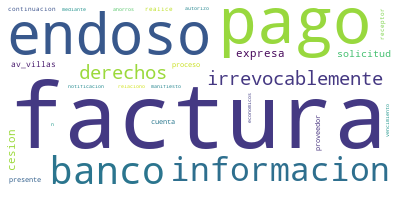

In [68]:
lista_mensajeuser=[]
for i in range(len(df_in)):
  lista_mensajeuser+=df_in[i]
long_string=''.join(lista_mensajeuser)
sal = pd.Series(long_string.split(' ')).value_counts()


sal2 = sal.reset_index()
sal2 = sal2.set_index('index')
saldic = sal2[0].to_dict()

#Creacion lista stop words
wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=1000, contour_width=50, contour_color='steelblue', margin=15, 
                      stopwords=[])
#Crear el word cloud
#wordcloud.generate(long_string)
wordcloud.generate_from_frequencies(saldic)
# wordcloud.generate(saldic)
#Visualizar el word cloud
wordcloud.to_file('personal_patrones.png')
wordcloud.to_image()

In [69]:
segmento = str.upper("{}".format(name))
# Iniciar el count vectorizer con stop words personalizado en español
count_vectorizer = CountVectorizer(stop_words=[])
# Ajustar y transformar los términos procesados
count_data = count_vectorizer.fit_transform(df_in)
#Visualizar los términos mas comunes
x , y= plot_10_most_common_words(count_data, count_vectorizer)

In [70]:
pd.Series(df_in.map(lambda x : x.split(' ')).sum()).value_counts().head(15).index

Index(['factura', 'solicitud', 'endoso', 'pago', 'banco', 'informacion',
       'derechos', 'av_villas', 'irrevocablemente', 'expresa', 'cesion',
       'proveedor', 'proceso', 'cuenta', 'presente'],
      dtype='object')

In [71]:
df_in.tolist()

['quiero realizar seguimiento solicitud registrada bajo radicado n',
 'permito informarles dia recibidas factura cuales pagaron dos factura utmm mes pendiente factura factura electronica anexo factura liquidacion contrato asi mismo adjunto documento endoso u documento adicional',
 'consulta factura',
 'dia hoy linea atencion proveedores llamada informaron factura mf iba ser cancelada dolares cuenta davivienda miami registrada embargo importante mencionar traves electronico adjunto notifico derechos correspondientes dicho documento habian sido cedidos irrevocablemente banco av_villas dado anterior requiero asignen dicho tercero pagador alternativo asi recursos asean consignados directamente cuenta muchas',
 'receptor pago posteado factura inde inde inde',
 'solicitud validar factura',
 'respetados senores informar factura t va proceso endoso banco av_villas adjunta factura electronica carta cesion derechos',
 'solicitudmos desbloqueo endoso factura tenia proveedor alternativo banco occi

In [72]:
dw = list(sent_to_words(df_in))

In [73]:
dw

[['quiero',
  'realizar',
  'seguimiento',
  'solicitud',
  'registrada',
  'bajo',
  'radicado'],
 ['permito',
  'informarles',
  'dia',
  'recibidas',
  'factura',
  'cuales',
  'pagaron',
  'dos',
  'factura',
  'utmm',
  'mes',
  'pendiente',
  'factura',
  'factura',
  'electronica',
  'anexo',
  'factura',
  'liquidacion',
  'contrato',
  'asi',
  'mismo',
  'adjunto',
  'documento',
  'endoso',
  'documento',
  'adicional'],
 ['consulta', 'factura'],
 ['dia',
  'hoy',
  'linea',
  'atencion',
  'proveedores',
  'llamada',
  'informaron',
  'factura',
  'mf',
  'iba',
  'ser',
  'cancelada',
  'dolares',
  'cuenta',
  'davivienda',
  'miami',
  'registrada',
  'embargo',
  'importante',
  'mencionar',
  'traves',
  'electronico',
  'adjunto',
  'notifico',
  'derechos',
  'dicho',
  'documento',
  'habian',
  'sido',
  'cedidos',
  'banco',
  'av_villas',
  'dado',
  'anterior',
  'requiero',
  'asignen',
  'dicho',
  'tercero',
  'pagador',
  'alternativo',
  'asi',
  'recursos'

In [74]:
len(dw)

181

In [75]:
# @title Creación del Corpus
%%time

nlp = spacy.load('es_core_news_md')

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in swseg] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(dw, min_count=5, threshold=100))
trigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(bigram[dw], threshold=100))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in lista_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#Definicion de segmento a analizar

# data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
# texts = data_lemmatized

data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_words_bigrams)

# texts = data_lemmatized
texts = data_words_bigrams



corpus = [id2word.doc2bow(text) for text in texts]

CPU times: user 17.6 s, sys: 391 ms, total: 18 s
Wall time: 18 s


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



In [76]:
# #@title Optimización del Modelo
# #Definicion del segmento persistente
# segmento = "Solucion"

# #Funcion de soporte
# def compute_coherence_values(corpus, dictionary, k, a, b):
    
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b,
#                                            per_word_topics=True)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
#     return coherence_model_lda.get_coherence()

# grid = {}
# grid['Validation_Set'] = {}

# #Rango de topicos
# min_topics = 2
# # max_topics = 11
# max_topics = 5
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# #Parametro Alpha
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# #Parametro Beta
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# #Conjuntos de validacion
# num_of_docs = len(corpus)
# corpus_sets = [corpus]

# corpus_title = ['100% Corpus']

# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# #Intensivo en tiempo (Promedio de tiempo: 2 Horas)

# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)
    
#     for i in range(len(corpus_sets)):
#         for k in topics_range:
#             for a in alpha:
#                 for b in beta:
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
#                                                   k=k, a=a, b=b)

#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv(segmento+'.csv', index=False)
#     pbar.close()

# #Persistencia de hiperparámetros
# model_results_tabc = pd.DataFrame(model_results)
# model_results_tabc.to_csv(segmento + '_model.csv')
# print("**", len(model_results_tabc), segmento, "\n")
# model_results_tabc.head()

# #Mejor Modelo
# model_results_tabc = pd.read_csv(segmento + '_model.csv')
# best_model = model_results_tabc[model_results_tabc.Coherence == model_results_tabc.Coherence.max()][:1]
# #display(best_model.head())

# #Hiperparámetros del mejor modelo
# Topics = int(best_model.Topics.item())
# Alpha = float(best_model.Alpha.item())
# Beta = float(best_model.Beta.item())

# print("HIPERPARÁMETROS DEL MODELO OPTIMIZADO:")
# print('\nNumero de Tópicos:', Topics)
# print('Parámetro Alfa:', Alpha)
# print('Parámetro Beta:', Beta)
# #esto estaba silenciado

In [77]:
#@title Modelo LDA Optimizado 
%%time
# se cambio la vesion de pylavis https://stackoverflow.com/questions/66123774/why-pyldavis-graph-does-not-display-topic-keywords-on-the-bar-chart
# import pyLDAvis.gensim
# %matplotlib inline
#Visualización del modelo
pyLDAvis.enable_notebook()
# pyLDAvis.enable_notebook(local=True)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.909999999999999,
                                           eta=0.61,                                        
                                           per_word_topics=True)

#Visualizacion de los tópicos generados en el modelo LDA
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Prerrequisitos minimos para la representacion grafica del modelado de topicos
d = id2word
c = corpus
lda = lda_model

#Parametros de visualizacion
data = pyLDAvis.gensim.prepare(lda, c, d)

#Persistencia de resultados de modelado de tópicos
pyLDAvis.save_html(data, 'vis_' +name + '.html')
print('\n\n')
#Visualizacion
display(data)


[(0,
  '0.021*"factura" + 0.021*"cesion" + 0.017*"notificacion" + '
  '0.015*"economicos" + 0.014*"derechos" + 0.010*"pago" + 0.009*"inde" + '
  '0.009*"solicitud" + 0.008*"electronico" + 0.008*"dias"'),
 (1,
  '0.057*"factura" + 0.042*"banco" + 0.031*"av_villas" + 0.028*"expresa" + '
  '0.020*"presente" + 0.018*"derechos" + 0.017*"pago" + 0.017*"cuenta" + '
  '0.016*"continuacion" + 0.016*"realice"'),
 (2,
  '0.089*"factura" + 0.050*"solicitud" + 0.047*"endoso" + 0.030*"pago" + '
  '0.029*"informacion" + 0.017*"proveedor" + 0.014*"consulta" + '
  '0.011*"proceso" + 0.010*"adjunto" + 0.009*"receptor"')]





PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.108347 -0.057013       1        1  40.263194
1     -0.116916 -0.045333       2        1  34.225779
0      0.008569  0.102346       3        1  25.511026, topic_info=             Term       Freq       Total Category  logprob  loglift
35          banco  27.000000   27.000000  Default  30.0000  30.0000
6       solicitud  41.000000   41.000000  Default  29.0000  29.0000
34      av_villas  20.000000   20.000000  Default  28.0000  28.0000
17         endoso  39.000000   39.000000  Default  27.0000  27.0000
191       expresa  18.000000   18.000000  Default  26.0000  26.0000
..            ...        ...         ...      ...      ...      ...
18        factura   9.855707  111.700771   Topic3  -3.8634  -1.0617
69           pago   4.712402   37.761185   Topic3  -4.6013  -0.7150
39         cuenta   3.252391   14.270809   Topic3  -4.9721  -0.1128
44   directamente   2.250220    4.219248   Topic3  -5.3404   0.7374
6       solicitud   4.006226   41.450996   Topic3  -4.7636  -0.9706

[160 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
286       1  0.779688     acreedor
205       1  0.694219      acuerdo
73        1  0.211192      adjunta
73        2  0.633575      adjunta
321       1  0.240891   adjuntamos
...     ...       ...          ...
203       2  0.930349         ttco
80        2  0.776223           va
80        3  0.258741           va
72        1  0.870385      validar
196       2  0.927634  vencimiento

[186 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

CPU times: user 880 ms, sys: 73.7 ms, total: 954 ms
Wall time: 2.25 s


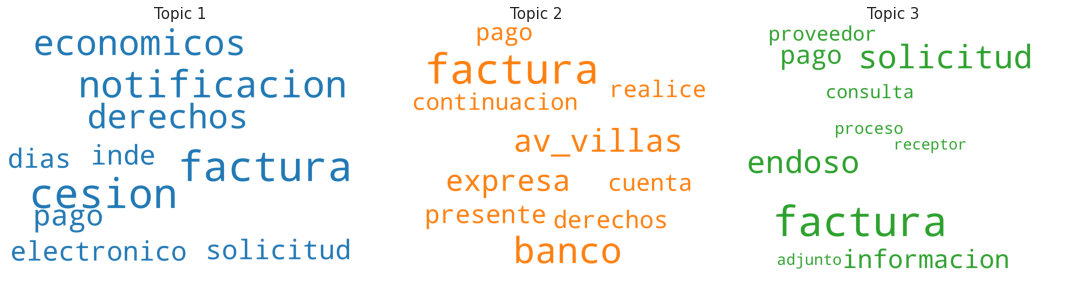

In [78]:
#@title Nubes de Palabras de los Términos clave N Principales en cada Tema
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=15))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.savefig("personal_{}_topics_{}_results.png".format(name,i+1),bbox_inches = 'tight')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [79]:
#@title Red Semántica

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[0]]])
# Funciones para bigrams, trigrams lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#Aplicacion de las respectivas funciones
#Formacion de bigramas
data_words_bigrams = make_bigrams(data_words)

#Creacion del diccionario
id2word = corpora.Dictionary(data_words_bigrams)

# Creacion del Corpus
texts = data_words_bigrams

#Frecuencia termino documento
corpus = [id2word.doc2bow(text) for text in texts]

#VEMOS CUANTOS TERMINOS ESTAN EN NUESTRO DICCIONARIO Y CUALES SON LOS MÁS FRECUENTE
word_freq = defaultdict(int)
for sent in data_words_bigrams:
    for i in sent:
        word_freq[i] += 10
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[50:100]

cores = multiprocessing.cpu_count()

##Entrenamiento del Modelo
w2v_model = Word2Vec(min_count=7, #SE CONSTRUYE EL VOCABULARIO A PARTIR DE LA FRECUENCIA DE APARICION QUE SE DEFINA AQUI
                     window=3,#SE AJUSTA EL NUMERO DE PALABRAS ATRAS Y ADELANTE DE LA PALABRA OBJETIVO PARA VECORIZARLA
                     size=30, #EL TAMANO DEL VECTOR DE CADA PALABRA
                     sample=1e-4, #-5 en principio #ESTE ES EL PARAMETRO QUE HAY QUE AJUSTAR, ES EL MAS SENSIBLE DEL MODELO
                     alpha=0.003, 
                     min_alpha=0.007, 
                     negative=10,
                     workers=cores-1)

#Construccion de vocabulario
w2v_model.build_vocab(data_words_bigrams, progress_per=10000)

#Entrenamiento del modelo
a=w2v_model.train(data_words_bigrams, total_examples=w2v_model.corpus_count, epochs=200, report_delay=1)

#Terminos similares
# w2v_model.wv.most_similar(positive=["contrasena"], topn=10)

##FUNCION PARA REDUCIR LA DIMENSION DEL ESPACIO DE PALABRAS Y PODER VISUALIZARLAS
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 30), dtype='f')
    word_labels = [word]
    color_list  = ["#25427B"] #a los colores de la campaña

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append("#33BBFF")
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append("#EBECED")
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    freq=[]
    for i in word_labels:
       freq.append(word_freq[i])

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list,'freq':freq})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': df['freq'],
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ('+ df["words"][line].title()+','+str(df['freq'][line])+')',
                 horizontalalignment='left',
                 verticalalignment='top', size='small',
                 #color=df['color'][line],
                 color='black',
                 weight='normal'
                ).set_size(11)
    
    plt.axis(emit=True)
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+30)
    plt.title('Visualización semántica para {}'.format(word.title()))

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



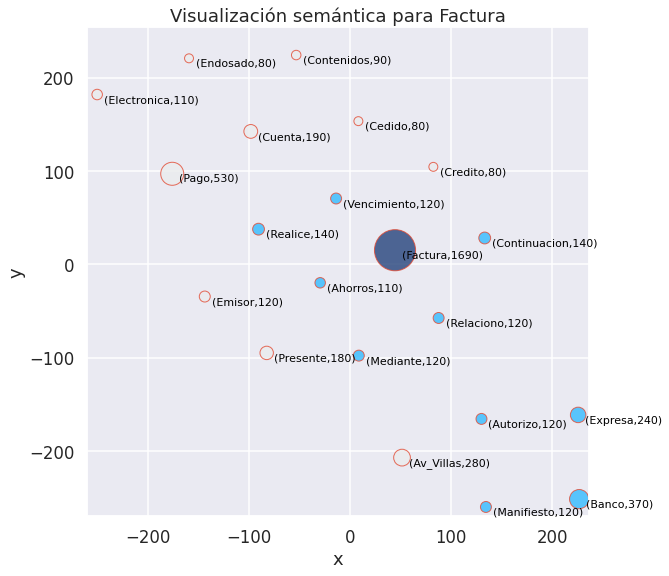

In [80]:
#@title
nombre = x[0]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')##

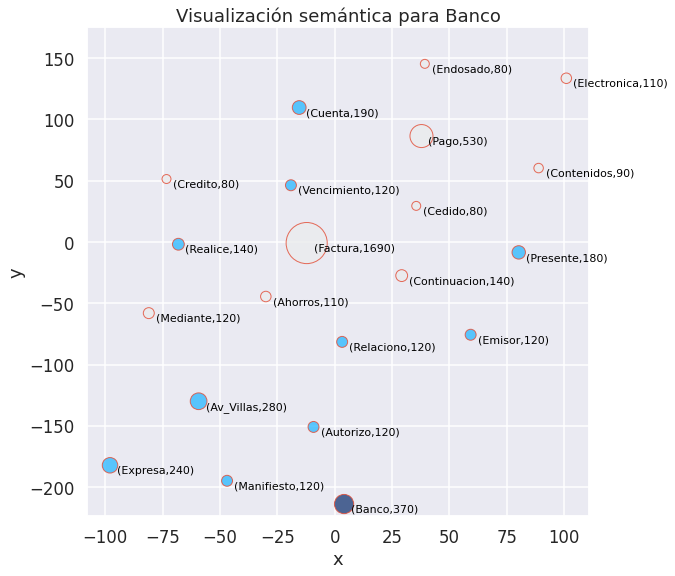

In [81]:
#@title


# tsnescatterplot(w2v_model, "activo", [t[0] for t in w2v_model.wv.most_similar(positive=["activo"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
#@title
nombre = 'banco' #x[1]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

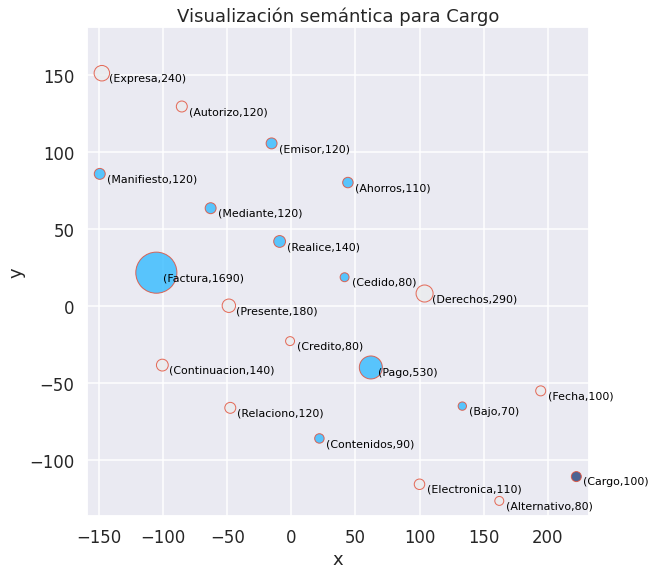

In [82]:
# @title 
#cuota se replaza por el temino clave que encontramos en las graficas de barras para 1-gramas
# tsnescatterplot(w2v_model, "confirmar", [t[0] for t in w2v_model.wv.most_similar(positive=["confirmar"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = 'cargo'#x[2]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

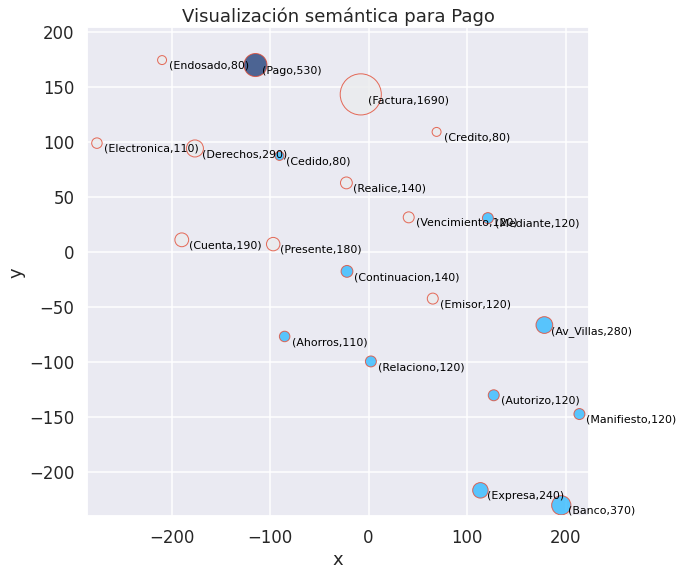

In [83]:
#@title
# tsnescatterplot(w2v_model, "actualizar", [t[0] for t in w2v_model.wv.most_similar(positive=["actualizar"], topn=20)][10:])
# plt.savefig("intereses_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
nombre = x[3]

tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

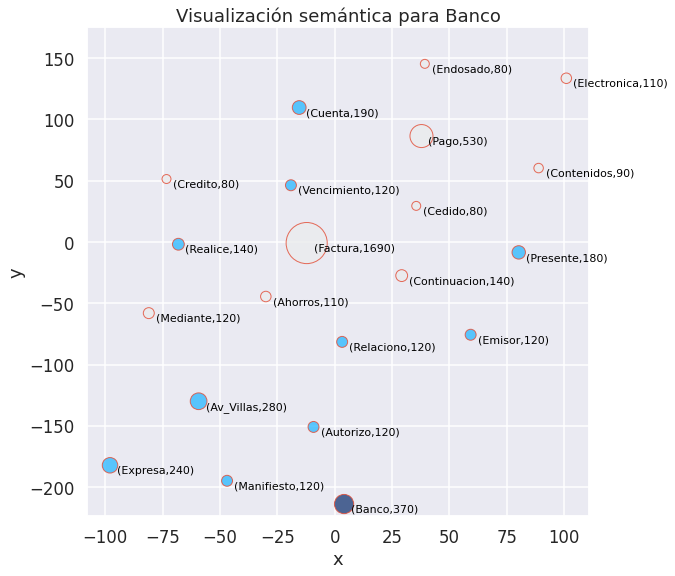

In [84]:
#@title
# tsnescatterplot(w2v_model, "codigo", [t[0] for t in w2v_model.wv.most_similar(positive=["codigo"], topn=20)][10:])
# plt.savefig("llegando_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[4]
# nombre = 'cargo' #interes
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

In [85]:
 word_vectors = w2v_model.wv
 word_vectors.save_word2vec_format('w2vecx_total_{}'.format(name))
 #Save model
from gensim.scripts.word2vec2tensor import word2vec2tensor 
word2vec2tensor('w2vecx_total_{}'.format(name), '{}_total_tensor00'.format(name))

In [86]:
#hacer version  con guines y sin guines que llos dijeron.

### Solucion

In [87]:
name = 'Solucion'

In [88]:
df_creacion =grupo['ObservacionCreacion'].copy()
df_solucion =grupo['ObservacionSolucion_+_n2'].copy()
df_in=df_solucion
df_in.iloc[0]

'asignacion receptor pago cenit realizar traves datosmaestros cenit transporte com validar administrador gestor contrato'

In [89]:
  for i in range(1,15):
    ng = i
    segmento = str.upper("({}_{}-gramas)".format(name,ng))
    # Iniciar el count vectorizer con stop words personalizado en español
    count_vectorizer = CountVectorizer(stop_words=[],ngram_range=(ng, ng))
    # Ajustar y transformar los términos procesados
    count_data = count_vectorizer.fit_transform(df_in)
    #Visualizar los términos mas comunes
    words,counts = plot_10_most_common_words(count_data, count_vectorizer)
    # buen dia , ecompetro com , com .co 
    print(words)

['factura', 'pago', 'solicitud', 'endoso', 'receptor', 'respuesta', 'bloqueo', 'informamos', 'proceso', 'cesion', 'fecha', 'derechos', 'envia', 'informacion', 'proveedor']


['receptor pago', 'cesion derechos', 'solicitud informamos', 'coordinacion cxp', 'informamos factura', 'presenta bloqueo', 'solicitud informar', 'atencion solicitud', 'bloqueo endoso', 'contingencia factura', 'mecanismo contingencia', 'atendiendo solicitud', 'derechos economicos', 'posible pago', 'respuesta proveedor']


['mecanismo contingencia factura', 'atendiendo solicitud informamos', 'cesion derechos economicos', 'atencion solicitud informar', 'genera respuesta proveedor', 'receptor alterno pago', 'envia notificacion electronico', 'informacion cesion derechos', 'aplica unicamente factura', 'causacion fecha radicado', 'coordinacion cxp coordinacioncxp', 'enviado requerimiento verifique', 'factura radicadas fisico', 'presenta bloqueo endoso', 'proceso causacion fecha']


['aplica unicamente factura radicadas', 'enviado requerimiento verifique solucionado', 'proceso causacion fecha radicado', 'unicamente factura radicadas fisico', 'bancarias empresas factoring radican', 'causacion fecha radicado dia', 'cesion derechos entidades bancarias', 'contingencia factura endosadas cesion', 'derechos entidades bancarias empresas', 'empresas factoring radican ventanillas', 'endosadas cesion derechos entidades', 'entidades bancarias empresas factoring', 'factoring radican ventanillas atencion', 'factura endosadas cesion derechos', 'informacion cesion derechos economicos']


['aplica unicamente factura radicadas fisico', 'bancarias empresas factoring radican ventanillas', 'cesion derechos entidades bancarias empresas', 'contingencia factura endosadas cesion derechos', 'derechos entidades bancarias empresas factoring', 'empresas factoring radican ventanillas atencion', 'endosadas cesion derechos entidades bancarias', 'entidades bancarias empresas factoring radican', 'factoring radican ventanillas atencion nivel', 'factura endosadas cesion derechos entidades', 'mecanismo contingencia factura endosadas cesion', 'proceso causacion fecha radicado dia', 'radican ventanillas atencion nivel nacional', 'cesion derechos economicos coordinacion cxp', 'derechos economicos coordinacion cxp coordinacioncxp']


['bancarias empresas factoring radican ventanillas atencion', 'cesion derechos entidades bancarias empresas factoring', 'contingencia factura endosadas cesion derechos entidades', 'derechos entidades bancarias empresas factoring radican', 'empresas factoring radican ventanillas atencion nivel', 'endosadas cesion derechos entidades bancarias empresas', 'entidades bancarias empresas factoring radican ventanillas', 'factoring radican ventanillas atencion nivel nacional', 'factura endosadas cesion derechos entidades bancarias', 'mecanismo contingencia factura endosadas cesion derechos', 'cesion derechos economicos coordinacion cxp coordinacioncxp', 'envio informacion cesion derechos economicos coordinacion', 'informacion cesion derechos economicos coordinacion cxp', 'tan pronto respuesta notificara mismo medio', 'coordinacion cxp coordinacioncxp respectivo tramite envio']


['bancarias empresas factoring radican ventanillas atencion nivel', 'cesion derechos entidades bancarias empresas factoring radican', 'contingencia factura endosadas cesion derechos entidades bancarias', 'derechos entidades bancarias empresas factoring radican ventanillas', 'empresas factoring radican ventanillas atencion nivel nacional', 'endosadas cesion derechos entidades bancarias empresas factoring', 'entidades bancarias empresas factoring radican ventanillas atencion', 'factura endosadas cesion derechos entidades bancarias empresas', 'mecanismo contingencia factura endosadas cesion derechos entidades', 'envio informacion cesion derechos economicos coordinacion cxp', 'informacion cesion derechos economicos coordinacion cxp coordinacioncxp', 'cesion derechos economicos coordinacion cxp coordinacioncxp respectivo', 'coordinacion cxp coordinacioncxp respectivo tramite envio correos', 'coordinacioncxp respectivo tramite envio correos dueno derechos', 'cxp coordinacioncxp respectivo tr

['bancarias empresas factoring radican ventanillas atencion nivel nacional', 'cesion derechos entidades bancarias empresas factoring radican ventanillas', 'contingencia factura endosadas cesion derechos entidades bancarias empresas', 'derechos entidades bancarias empresas factoring radican ventanillas atencion', 'endosadas cesion derechos entidades bancarias empresas factoring radican', 'entidades bancarias empresas factoring radican ventanillas atencion nivel', 'factura endosadas cesion derechos entidades bancarias empresas factoring', 'mecanismo contingencia factura endosadas cesion derechos entidades bancarias', 'envio informacion cesion derechos economicos coordinacion cxp coordinacioncxp', 'cesion derechos economicos coordinacion cxp coordinacioncxp respectivo tramite', 'coordinacion cxp coordinacioncxp respectivo tramite envio correos dueno', 'coordinacioncxp respectivo tramite envio correos dueno derechos factura', 'cxp coordinacioncxp respectivo tramite envio correos dueno dere

['cesion derechos entidades bancarias empresas factoring radican ventanillas atencion', 'contingencia factura endosadas cesion derechos entidades bancarias empresas factoring', 'derechos entidades bancarias empresas factoring radican ventanillas atencion nivel', 'endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas', 'entidades bancarias empresas factoring radican ventanillas atencion nivel nacional', 'factura endosadas cesion derechos entidades bancarias empresas factoring radican', 'mecanismo contingencia factura endosadas cesion derechos entidades bancarias empresas', 'cesion derechos economicos coordinacion cxp coordinacioncxp respectivo tramite envio', 'coordinacion cxp coordinacioncxp respectivo tramite envio correos dueno derechos', 'cxp coordinacioncxp respectivo tramite envio correos dueno derechos factura', 'derechos economicos coordinacion cxp coordinacioncxp respectivo tramite envio correos', 'economicos coordinacion cxp coordinacioncxp respe

['cesion derechos entidades bancarias empresas factoring radican ventanillas atencion nivel', 'contingencia factura endosadas cesion derechos entidades bancarias empresas factoring radican', 'derechos entidades bancarias empresas factoring radican ventanillas atencion nivel nacional', 'endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas atencion', 'factura endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas', 'mecanismo contingencia factura endosadas cesion derechos entidades bancarias empresas factoring', 'cesion derechos economicos coordinacion cxp coordinacioncxp respectivo tramite envio correos', 'coordinacion cxp coordinacioncxp respectivo tramite envio correos dueno derechos factura', 'derechos economicos coordinacion cxp coordinacioncxp respectivo tramite envio correos dueno', 'economicos coordinacion cxp coordinacioncxp respectivo tramite envio correos dueno derechos', 'envio informacion cesion derechos economico

['cesion derechos entidades bancarias empresas factoring radican ventanillas atencion nivel nacional', 'contingencia factura endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas', 'endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas atencion nivel', 'factura endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas atencion', 'mecanismo contingencia factura endosadas cesion derechos entidades bancarias empresas factoring radican', 'cesion derechos economicos coordinacion cxp coordinacioncxp respectivo tramite envio correos dueno', 'derechos economicos coordinacion cxp coordinacioncxp respectivo tramite envio correos dueno derechos', 'economicos coordinacion cxp coordinacioncxp respectivo tramite envio correos dueno derechos factura', 'envio informacion cesion derechos economicos coordinacion cxp coordinacioncxp respectivo tramite envio', 'informacion cesion derechos economicos coordinacion cxp c

['contingencia factura endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas atencion', 'endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas atencion nivel nacional', 'factura endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas atencion nivel', 'mecanismo contingencia factura endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas', 'cesion derechos economicos coordinacion cxp coordinacioncxp respectivo tramite envio correos dueno derechos', 'derechos economicos coordinacion cxp coordinacioncxp respectivo tramite envio correos dueno derechos factura', 'envio informacion cesion derechos economicos coordinacion cxp coordinacioncxp respectivo tramite envio correos', 'informacion cesion derechos economicos coordinacion cxp coordinacioncxp respectivo tramite envio correos dueno', 'atencion solicitud informar requerimiento remitido validacion tan pronto respuesta noti

['contingencia factura endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas atencion nivel', 'factura endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas atencion nivel nacional', 'mecanismo contingencia factura endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas atencion', 'cesion derechos economicos coordinacion cxp coordinacioncxp respectivo tramite envio correos dueno derechos factura', 'envio informacion cesion derechos economicos coordinacion cxp coordinacioncxp respectivo tramite envio correos dueno', 'informacion cesion derechos economicos coordinacion cxp coordinacioncxp respectivo tramite envio correos dueno derechos', 'contexto emergencia salud publica ocasion covid mecanismo contingencia factura endosadas cesion derechos entidades', 'covid mecanismo contingencia factura endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas', 'emergencia salud publ

['contingencia factura endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas atencion nivel nacional', 'mecanismo contingencia factura endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas atencion nivel', 'envio informacion cesion derechos economicos coordinacion cxp coordinacioncxp respectivo tramite envio correos dueno derechos', 'informacion cesion derechos economicos coordinacion cxp coordinacioncxp respectivo tramite envio correos dueno derechos factura', 'contexto emergencia salud publica ocasion covid mecanismo contingencia factura endosadas cesion derechos entidades bancarias', 'covid mecanismo contingencia factura endosadas cesion derechos entidades bancarias empresas factoring radican ventanillas atencion', 'emergencia salud publica ocasion covid mecanismo contingencia factura endosadas cesion derechos entidades bancarias empresas', 'factura endosadas cesion derechos entidades bancarias empresas factoring radican 

In [90]:
df_in.reset_index(inplace=True, drop=True)

In [91]:
df_in=df_in.apply(lambda x: x.strip())

In [92]:
df_in.head(3)

0    asignacion receptor pago cenit realizar traves...
1    informamos factura utmm utmm utmm presentan bl...
2                       envia notificacion electronico
Name: ObservacionSolucion_+_n2, dtype: object

In [93]:
df_in[2]

'envia notificacion electronico'

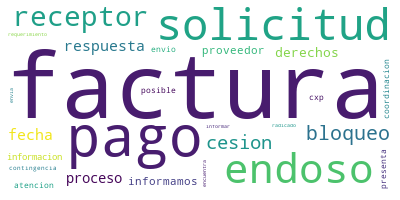

In [94]:
lista_mensajeuser=[]
for i in range(len(df_in)):
  lista_mensajeuser+=df_in[i]
long_string=''.join(lista_mensajeuser)
sal = pd.Series(long_string.split(' ')).value_counts()


sal2 = sal.reset_index()
sal2 = sal2.set_index('index')
saldic = sal2[0].to_dict()

#Creacion lista stop words
wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=1000, contour_width=50, contour_color='steelblue', margin=15, 
                      stopwords=[])
#Crear el word cloud
#wordcloud.generate(long_string)
wordcloud.generate_from_frequencies(saldic)
# wordcloud.generate(saldic)
#Visualizar el word cloud
wordcloud.to_file('personal_patrones{}.png'.format(name))
wordcloud.to_image()

In [95]:
segmento = str.upper("{}".format(name))
# Iniciar el count vectorizer con stop words personalizado en español
count_vectorizer = CountVectorizer(stop_words=[])
# Ajustar y transformar los términos procesados
count_data = count_vectorizer.fit_transform(df_in)
#Visualizar los términos mas comunes
x , y= plot_10_most_common_words(count_data, count_vectorizer)

In [96]:
pd.Series(df_in.map(lambda x : x.split(' ')).sum()).value_counts().head(15).index

Index(['factura', 'pago', 'solicitud', 'endoso', 'receptor', 'respuesta',
       'bloqueo', 'informamos', 'proceso', 'cesion', 'fecha', 'derechos',
       'informacion', 'envia', 'proveedor'],
      dtype='object')

In [97]:
df_in.tolist()

['asignacion receptor pago cenit realizar traves datosmaestros cenit transporte com validar administrador gestor contrato',
 'informamos factura utmm utmm utmm presentan bloqueo endoso referencia factura original reposa cuentas pagar tramitado proceso endoso cesion tal razon remita envio receptor dueno pago coordinacion cxp coordinacioncxp solicitud endoso manera validar desbloqueo',
 'envia notificacion electronico',
 'damos respuesta',
 'envia solicitud envia coordinacion cxp solicitudmos verificando factura inde inde inde acreedor independence drilling factursa registran bloqueo adjuntamos correos soporte radicado endoso',
 'reenvia ingry relacionar receptor pago segun adjuntos cesion derechos economicos',
 'aplica unicamente factura radicadas fisico',
 'informamos factura fea modificada dia receptor alterno pago banco occidente posible pago dia',
 'responde informando proceso factoring registra',
 'envia notificacion electronico',
 'factura fzb encuentra contabilizada bloqueos nove

In [98]:
dw = list(sent_to_words(df_in))

In [99]:
dw

[['asignacion',
  'receptor',
  'pago',
  'cenit',
  'realizar',
  'traves',
  'datosmaestros',
  'cenit',
  'transporte',
  'com',
  'validar',
  'administrador',
  'gestor',
  'contrato'],
 ['informamos',
  'factura',
  'utmm',
  'utmm',
  'utmm',
  'presentan',
  'bloqueo',
  'endoso',
  'referencia',
  'factura',
  'original',
  'reposa',
  'cuentas',
  'pagar',
  'tramitado',
  'proceso',
  'endoso',
  'cesion',
  'tal',
  'razon',
  'remita',
  'envio',
  'receptor',
  'dueno',
  'pago',
  'coordinacion',
  'cxp',
  'coordinacioncxp',
  'solicitud',
  'endoso',
  'manera',
  'validar',
  'desbloqueo'],
 ['envia', 'notificacion', 'electronico'],
 ['damos', 'respuesta'],
 ['envia',
  'solicitud',
  'envia',
  'coordinacion',
  'cxp',
  'solicitudmos',
  'verificando',
  'factura',
  'inde',
  'inde',
  'inde',
  'acreedor',
  'independence',
  'drilling',
  'factursa',
  'registran',
  'bloqueo',
  'adjuntamos',
  'correos',
  'soporte',
  'radicado',
  'endoso'],
 ['reenvia',
  'i

In [100]:
len(dw)

181

In [101]:
# @title Creación del Corpus
%%time

nlp = spacy.load('es_core_news_md')

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in swseg] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(dw, min_count=5, threshold=100))
trigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(bigram[dw], threshold=100))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in lista_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#Definicion de segmento a analizar

# data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
# texts = data_lemmatized

data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_words_bigrams)

# texts = data_lemmatized
texts = data_words_bigrams



corpus = [id2word.doc2bow(text) for text in texts]

CPU times: user 18.1 s, sys: 465 ms, total: 18.6 s
Wall time: 18.6 s


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



In [102]:
# #@title Optimización del Modelo
# #Definicion del segmento persistente
# segmento = "Solucion"

# #Funcion de soporte
# def compute_coherence_values(corpus, dictionary, k, a, b):
    
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b,
#                                            per_word_topics=True)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
#     return coherence_model_lda.get_coherence()

# grid = {}
# grid['Validation_Set'] = {}

# #Rango de topicos
# min_topics = 2
# # max_topics = 11
# max_topics = 5
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# #Parametro Alpha
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# #Parametro Beta
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# #Conjuntos de validacion
# num_of_docs = len(corpus)
# corpus_sets = [corpus]

# corpus_title = ['100% Corpus']

# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# #Intensivo en tiempo (Promedio de tiempo: 2 Horas)

# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)
    
#     for i in range(len(corpus_sets)):
#         for k in topics_range:
#             for a in alpha:
#                 for b in beta:
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
#                                                   k=k, a=a, b=b)

#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv(segmento+'.csv', index=False)
#     pbar.close()

# #Persistencia de hiperparámetros
# model_results_tabc = pd.DataFrame(model_results)
# model_results_tabc.to_csv(segmento + '_model.csv')
# print("**", len(model_results_tabc), segmento, "\n")
# model_results_tabc.head()

# #Mejor Modelo
# model_results_tabc = pd.read_csv(segmento + '_model.csv')
# best_model = model_results_tabc[model_results_tabc.Coherence == model_results_tabc.Coherence.max()][:1]
# #display(best_model.head())

# #Hiperparámetros del mejor modelo
# Topics = int(best_model.Topics.item())
# Alpha = float(best_model.Alpha.item())
# Beta = float(best_model.Beta.item())

# print("HIPERPARÁMETROS DEL MODELO OPTIMIZADO:")
# print('\nNumero de Tópicos:', Topics)
# print('Parámetro Alfa:', Alpha)
# print('Parámetro Beta:', Beta)
# #esto estaba silenciado

In [103]:
#@title Modelo LDA Optimizado 
%%time
# se cambio la vesion de pylavis https://stackoverflow.com/questions/66123774/why-pyldavis-graph-does-not-display-topic-keywords-on-the-bar-chart
# import pyLDAvis.gensim
# %matplotlib inline
#Visualización del modelo
pyLDAvis.enable_notebook()
# pyLDAvis.enable_notebook(local=True)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.909999999999999,
                                           eta=0.61,                                        
                                           per_word_topics=True)

#Visualizacion de los tópicos generados en el modelo LDA
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Prerrequisitos minimos para la representacion grafica del modelado de topicos
d = id2word
c = corpus
lda = lda_model

#Parametros de visualizacion
data = pyLDAvis.gensim.prepare(lda, c, d)

#Persistencia de resultados de modelado de tópicos
pyLDAvis.save_html(data, 'vis_' +name + '.html')
print('\n\n')
#Visualizacion
display(data)


[(0,
  '0.038*"factura" + 0.030*"derechos" + 0.026*"informacion" + 0.025*"cesion" + '
  '0.016*"contingencia" + 0.015*"informamos" + 0.013*"mecanismo" + '
  '0.012*"economicos" + 0.012*"solicitud" + 0.012*"requerimiento"'),
 (1,
  '0.029*"respuesta" + 0.026*"proceso" + 0.025*"solicitud" + 0.025*"envia" + '
  '0.014*"electronico" + 0.013*"validacion" + 0.012*"estimado" + '
  '0.012*"informa" + 0.011*"filtro" + 0.011*"notificacion"'),
 (2,
  '0.061*"factura" + 0.046*"pago" + 0.037*"endoso" + 0.028*"receptor" + '
  '0.026*"bloqueo" + 0.017*"fecha" + 0.017*"solicitud" + 0.015*"informamos" + '
  '0.013*"dia" + 0.011*"presenta"')]





PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.017629 -0.113041       1        1  46.254832
0     -0.110258  0.041787       2        1  28.141279
1      0.092628  0.071254       3        1  25.603889, topic_info=              Term       Freq      Total Category  logprob  loglift
7             pago  49.000000  49.000000  Default  30.0000  30.0000
56        derechos  21.000000  21.000000  Default  29.0000  29.0000
9         receptor  30.000000  30.000000  Default  28.0000  28.0000
39           envia  15.000000  15.000000  Default  27.0000  27.0000
84     informacion  17.000000  17.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
18             cxp   4.692103  15.825839   Topic3  -4.8232   0.1467
82           fecha   4.993877  23.706080   Topic3  -4.7609  -0.1951
50        radicado   4.105826  13.749263   Topic3  -4.9567   0.1538
182      proveedor   4.192426  17.396229   Topic3  -4.9358  -0.0605
158  requerimiento   3.877225  13.337977   Topic3  -5.0139   0.1269

[169 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
43        1  0.628732       acreedor
43        3  0.314366       acreedor
0         1  0.895940  administrador
0         2  0.149323  administrador
66        1  0.931466        alterno
...     ...       ...            ...
466       3  0.705480   verificacion
256       1  0.153864      verifique
256       2  0.769320      verifique
295       3  0.607032            vez
240       1  0.712158        vizcaya

[217 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

CPU times: user 942 ms, sys: 31 ms, total: 973 ms
Wall time: 1.15 s


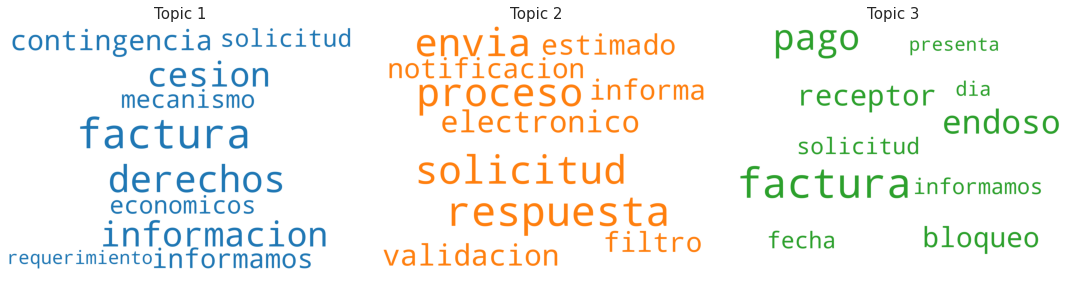

In [104]:
#@title Nubes de Palabras de los Términos clave N Principales en cada Tema
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=15))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.savefig("personal_{}_topics_{}_results.png".format(name,i+1),bbox_inches = 'tight')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [105]:
#@title Red Semántica

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[0]]])
# Funciones para bigrams, trigrams lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#Aplicacion de las respectivas funciones
#Formacion de bigramas
data_words_bigrams = make_bigrams(data_words)

#Creacion del diccionario
id2word = corpora.Dictionary(data_words_bigrams)

# Creacion del Corpus
texts = data_words_bigrams

#Frecuencia termino documento
corpus = [id2word.doc2bow(text) for text in texts]

#VEMOS CUANTOS TERMINOS ESTAN EN NUESTRO DICCIONARIO Y CUALES SON LOS MÁS FRECUENTE
word_freq = defaultdict(int)
for sent in data_words_bigrams:
    for i in sent:
        word_freq[i] += 10
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[50:100]

cores = multiprocessing.cpu_count()

##Entrenamiento del Modelo
w2v_model = Word2Vec(min_count=7, #SE CONSTRUYE EL VOCABULARIO A PARTIR DE LA FRECUENCIA DE APARICION QUE SE DEFINA AQUI
                     window=3,#SE AJUSTA EL NUMERO DE PALABRAS ATRAS Y ADELANTE DE LA PALABRA OBJETIVO PARA VECORIZARLA
                     size=30, #EL TAMANO DEL VECTOR DE CADA PALABRA
                     sample=1e-4, #-5 en principio #ESTE ES EL PARAMETRO QUE HAY QUE AJUSTAR, ES EL MAS SENSIBLE DEL MODELO
                     alpha=0.003, 
                     min_alpha=0.007, 
                     negative=10,
                     workers=cores-1)

#Construccion de vocabulario
w2v_model.build_vocab(data_words_bigrams, progress_per=10000)

#Entrenamiento del modelo
a=w2v_model.train(data_words_bigrams, total_examples=w2v_model.corpus_count, epochs=200, report_delay=1)

#Terminos similares
# w2v_model.wv.most_similar(positive=["contrasena"], topn=10)

##FUNCION PARA REDUCIR LA DIMENSION DEL ESPACIO DE PALABRAS Y PODER VISUALIZARLAS
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 30), dtype='f')
    word_labels = [word]
    color_list  = ["#25427B"] #a los colores de la campaña

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append("#33BBFF")
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append("#EBECED")
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    freq=[]
    for i in word_labels:
       freq.append(word_freq[i])

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list,'freq':freq})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': df['freq'],
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ('+ df["words"][line].title()+','+str(df['freq'][line])+')',
                 horizontalalignment='left',
                 verticalalignment='top', size='small',
                 #color=df['color'][line],
                 color='black',
                 weight='normal'
                ).set_size(11)
    
    plt.axis(emit=True)
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+30)
    plt.title('Visualización semántica para {}'.format(word.title()))

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



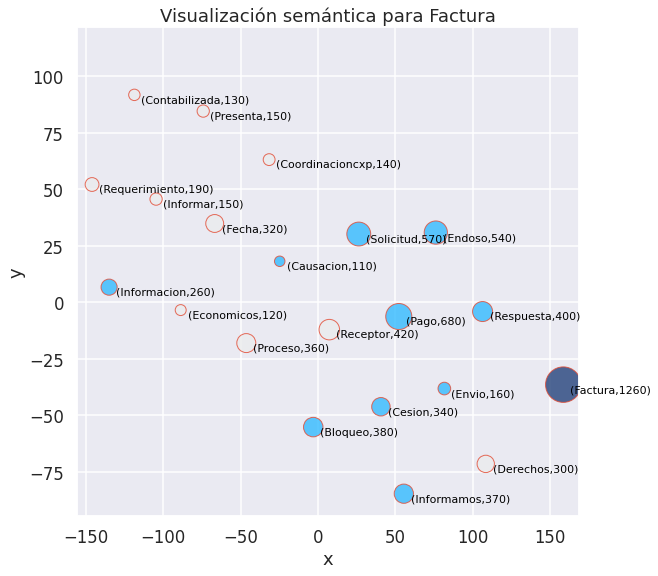

In [106]:
#@title
nombre = x[0]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')##

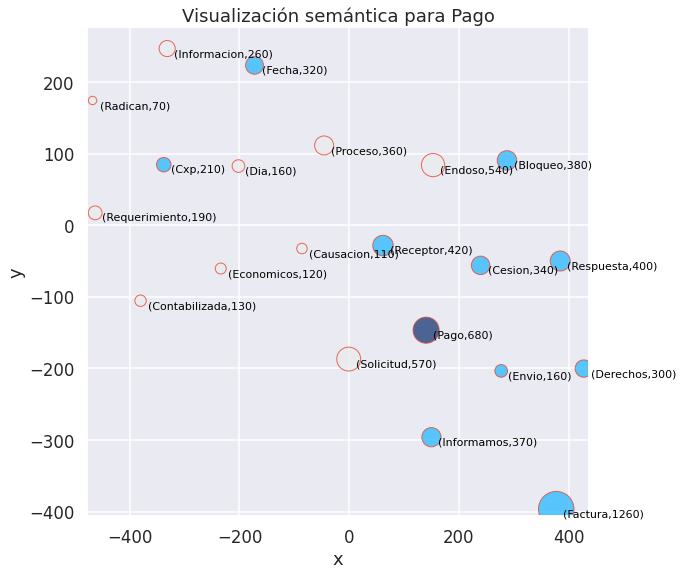

In [107]:
#@title


# tsnescatterplot(w2v_model, "activo", [t[0] for t in w2v_model.wv.most_similar(positive=["activo"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
#@title
nombre = x[1]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

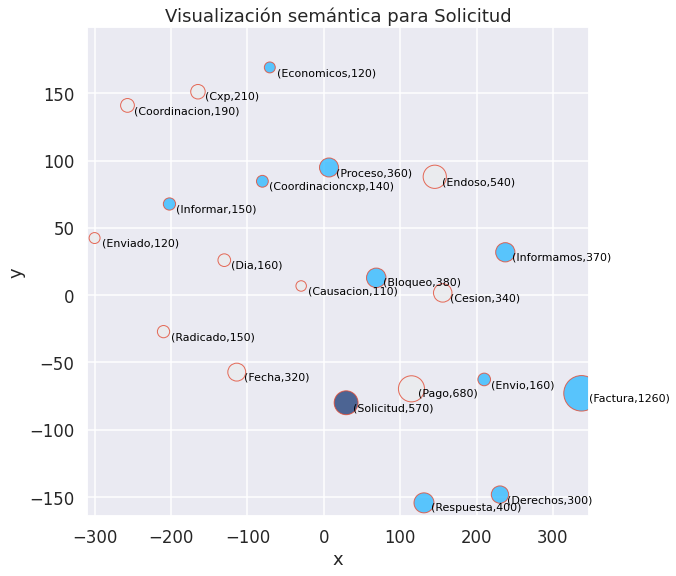

In [108]:
# @title 
#cuota se replaza por el temino clave que encontramos en las graficas de barras para 1-gramas
# tsnescatterplot(w2v_model, "confirmar", [t[0] for t in w2v_model.wv.most_similar(positive=["confirmar"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[2]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

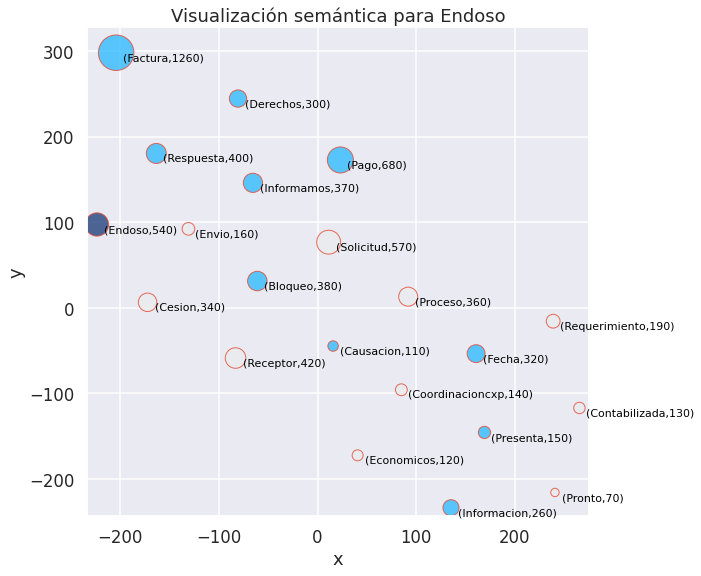

In [109]:
#@title
# tsnescatterplot(w2v_model, "actualizar", [t[0] for t in w2v_model.wv.most_similar(positive=["actualizar"], topn=20)][10:])
# plt.savefig("intereses_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
nombre = x[3]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

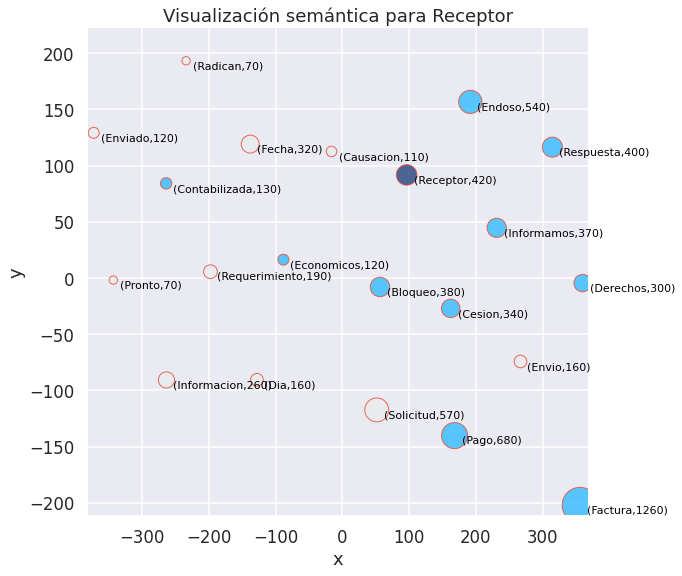

In [110]:
#@title
# tsnescatterplot(w2v_model, "codigo", [t[0] for t in w2v_model.wv.most_similar(positive=["codigo"], topn=20)][10:])
# plt.savefig("llegando_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[4]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

In [111]:
 word_vectors = w2v_model.wv
 word_vectors.save_word2vec_format('w2vecx_total_{}'.format(name))
 #Save model
from gensim.scripts.word2vec2tensor import word2vec2tensor 
word2vec2tensor('w2vecx_total_{}'.format(name), '{}_total_tensor00'.format(name))

In [112]:
#hacer version  con guines y sin guines que llos dijeron.

### Total

In [113]:
name = 'Total'

In [114]:
df_creacion =grupo['ObservacionCreacion'].copy()
df_solucion =grupo['ObservacionSolucion_+_n2'].copy()
df_in=df_creacion+ ' '+ df_solucion
df_in.iloc[0]

'quiero realizar seguimiento solicitud registrada bajo radicado n asignacion receptor pago cenit realizar traves datosmaestros cenit transporte com validar administrador gestor contrato'

In [115]:
  for i in range(1,6):
    ng = i
    segmento = str.upper("({}_{}-gramas)".format(name,ng))
    # Iniciar el count vectorizer con stop words personalizado en español
    count_vectorizer = CountVectorizer(stop_words=[],ngram_range=(ng, ng))
    # Ajustar y transformar los términos procesados
    count_data = count_vectorizer.fit_transform(df_in)
    #Visualizar los términos mas comunes
    words,counts = plot_10_most_common_words(count_data, count_vectorizer)
    # buen dia , ecompetro com , com .co 
    print(words)

['factura', 'pago', 'solicitud', 'endoso', 'informacion', 'derechos', 'cesion', 'receptor', 'proceso', 'respuesta', 'proveedor', 'banco', 'fecha', 'informamos', 'bloqueo']


['cesion derechos', 'receptor pago', 'endoso factura', 'solicitud informacion', 'banco av_villas', 'derechos economicos', 'expresa irrevocablemente', 'coordinacion cxp', 'solicitud informamos', 'pago factura', 'proceso endoso', 'informamos factura', 'atencion solicitud', 'persona consulta', 'presenta bloqueo']


['cesion derechos economicos', 'mecanismo contingencia factura', 'solicitud informacion factura', 'atendiendo solicitud informamos', 'autorizo expresa irrevocablemente', 'continuacion mediante presente', 'envia notificacion electronico', 'expresa irrevocablemente vencimiento', 'irrevocablemente vencimiento realice', 'manifiesto expresa irrevocablemente', 'mediante presente manifiesto', 'presente manifiesto expresa', 'realice pago cuenta', 'receptor alterno pago', 'relaciono continuacion mediante']


['autorizo expresa irrevocablemente vencimiento', 'continuacion mediante presente manifiesto', 'expresa irrevocablemente vencimiento realice', 'irrevocablemente vencimiento realice pago', 'mediante presente manifiesto expresa', 'presente manifiesto expresa irrevocablemente', 'relaciono continuacion mediante presente', 'vencimiento realice pago cuenta', 'av_villas autorizo expresa irrevocablemente', 'banco av_villas autorizo expresa', 'cuenta ahorros banco av_villas', 'pago cuenta ahorros banco', 'realice pago cuenta ahorros', 'emisor factura relaciono continuacion', 'factura relaciono continuacion mediante']


['autorizo expresa irrevocablemente vencimiento realice', 'continuacion mediante presente manifiesto expresa', 'expresa irrevocablemente vencimiento realice pago', 'irrevocablemente vencimiento realice pago cuenta', 'mediante presente manifiesto expresa irrevocablemente', 'relaciono continuacion mediante presente manifiesto', 'av_villas autorizo expresa irrevocablemente vencimiento', 'banco av_villas autorizo expresa irrevocablemente', 'pago cuenta ahorros banco av_villas', 'realice pago cuenta ahorros banco', 'vencimiento realice pago cuenta ahorros', 'emisor factura relaciono continuacion mediante', 'factura relaciono continuacion mediante presente', 'manifiesto expresa irrevocablemente endosado banco', 'presente manifiesto expresa irrevocablemente endosado']


In [116]:
df_in.reset_index(inplace=True, drop=True)

In [117]:
df_in=df_in.apply(lambda x: x.strip())

In [118]:
df_in.head(3)

0    quiero realizar seguimiento solicitud registra...
1    permito informarles dia recibidas factura cual...
2      consulta factura envia notificacion electronico
dtype: object

In [119]:
df_in[2]

'consulta factura envia notificacion electronico'

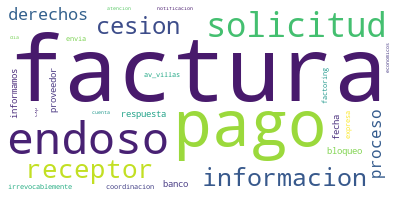

In [120]:
lista_mensajeuser=[]
for i in range(len(df_in)):
  lista_mensajeuser+=df_in[i]
long_string=''.join(lista_mensajeuser)
sal = pd.Series(long_string.split(' ')).value_counts()


sal2 = sal.reset_index()
sal2 = sal2.set_index('index')
saldic = sal2[0].to_dict()

#Creacion lista stop words
wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=1000, contour_width=50, contour_color='steelblue', margin=15, 
                      stopwords=[])
#Crear el word cloud
#wordcloud.generate(long_string)
wordcloud.generate_from_frequencies(saldic)
# wordcloud.generate(saldic)
#Visualizar el word cloud
wordcloud.to_file('personal_patrones.png')
wordcloud.to_image()

In [121]:
segmento = str.upper("{}".format(name))
# Iniciar el count vectorizer con stop words personalizado en español
count_vectorizer = CountVectorizer(stop_words=[])
# Ajustar y transformar los términos procesados
count_data = count_vectorizer.fit_transform(df_in)
#Visualizar los términos mas comunes
x , y= plot_10_most_common_words(count_data, count_vectorizer)

In [122]:
pd.Series(df_in.map(lambda x : x.split(' ')).sum()).value_counts().head(15).index

Index(['factura', 'solicitud', 'pago', 'endoso', 'informacion', 'derechos',
       'receptor', 'cesion', 'proceso', 'respuesta', 'proveedor', 'banco',
       'fecha', 'informamos', 'bloqueo'],
      dtype='object')

In [123]:
df_in.tolist()

['quiero realizar seguimiento solicitud registrada bajo radicado n asignacion receptor pago cenit realizar traves datosmaestros cenit transporte com validar administrador gestor contrato',
 'permito informarles dia recibidas factura cuales pagaron dos factura utmm mes pendiente factura factura electronica anexo factura liquidacion contrato asi mismo adjunto documento endoso u documento adicional informamos factura utmm utmm utmm presentan bloqueo endoso referencia factura original reposa cuentas pagar tramitado proceso endoso cesion tal razon remita envio receptor dueno pago coordinacion cxp coordinacioncxp solicitud endoso manera validar desbloqueo',
 'consulta factura envia notificacion electronico',
 'dia hoy linea atencion proveedores llamada informaron factura mf iba ser cancelada dolares cuenta davivienda miami registrada embargo importante mencionar traves electronico adjunto notifico derechos correspondientes dicho documento habian sido cedidos irrevocablemente banco av_villas 

In [124]:
dw = list(sent_to_words(df_in))

In [125]:
dw

[['quiero',
  'realizar',
  'seguimiento',
  'solicitud',
  'registrada',
  'bajo',
  'radicado',
  'asignacion',
  'receptor',
  'pago',
  'cenit',
  'realizar',
  'traves',
  'datosmaestros',
  'cenit',
  'transporte',
  'com',
  'validar',
  'administrador',
  'gestor',
  'contrato'],
 ['permito',
  'informarles',
  'dia',
  'recibidas',
  'factura',
  'cuales',
  'pagaron',
  'dos',
  'factura',
  'utmm',
  'mes',
  'pendiente',
  'factura',
  'factura',
  'electronica',
  'anexo',
  'factura',
  'liquidacion',
  'contrato',
  'asi',
  'mismo',
  'adjunto',
  'documento',
  'endoso',
  'documento',
  'adicional',
  'informamos',
  'factura',
  'utmm',
  'utmm',
  'utmm',
  'presentan',
  'bloqueo',
  'endoso',
  'referencia',
  'factura',
  'original',
  'reposa',
  'cuentas',
  'pagar',
  'tramitado',
  'proceso',
  'endoso',
  'cesion',
  'tal',
  'razon',
  'remita',
  'envio',
  'receptor',
  'dueno',
  'pago',
  'coordinacion',
  'cxp',
  'coordinacioncxp',
  'solicitud',
  'e

In [126]:
len(dw)

181

In [127]:
# @title Creación del Corpus
%%time

nlp = spacy.load('es_core_news_md')

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in swseg] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(dw, min_count=5, threshold=100))
trigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(bigram[dw], threshold=100))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in lista_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#Definicion de segmento a analizar

# data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
# texts = data_lemmatized

data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_words_bigrams)

# texts = data_lemmatized
texts = data_words_bigrams



corpus = [id2word.doc2bow(text) for text in texts]

CPU times: user 20.7 s, sys: 1.37 s, total: 22.1 s
Wall time: 22.1 s


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



In [128]:
# #@title Optimización del Modelo
# #Definicion del segmento persistente
# segmento = "Solucion"

# #Funcion de soporte
# def compute_coherence_values(corpus, dictionary, k, a, b):
    
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b,
#                                            per_word_topics=True)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
#     return coherence_model_lda.get_coherence()

# grid = {}
# grid['Validation_Set'] = {}

# #Rango de topicos
# min_topics = 2
# # max_topics = 11
# max_topics = 5
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# #Parametro Alpha
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# #Parametro Beta
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# #Conjuntos de validacion
# num_of_docs = len(corpus)
# corpus_sets = [corpus]

# corpus_title = ['100% Corpus']

# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# #Intensivo en tiempo (Promedio de tiempo: 2 Horas)

# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)
    
#     for i in range(len(corpus_sets)):
#         for k in topics_range:
#             for a in alpha:
#                 for b in beta:
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
#                                                   k=k, a=a, b=b)

#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv(segmento+'.csv', index=False)
#     pbar.close()

# #Persistencia de hiperparámetros
# model_results_tabc = pd.DataFrame(model_results)
# model_results_tabc.to_csv(segmento + '_model.csv')
# print("**", len(model_results_tabc), segmento, "\n")
# model_results_tabc.head()

# #Mejor Modelo
# model_results_tabc = pd.read_csv(segmento + '_model.csv')
# best_model = model_results_tabc[model_results_tabc.Coherence == model_results_tabc.Coherence.max()][:1]
# #display(best_model.head())

# #Hiperparámetros del mejor modelo
# Topics = int(best_model.Topics.item())
# Alpha = float(best_model.Alpha.item())
# Beta = float(best_model.Beta.item())

# print("HIPERPARÁMETROS DEL MODELO OPTIMIZADO:")
# print('\nNumero de Tópicos:', Topics)
# print('Parámetro Alfa:', Alpha)
# print('Parámetro Beta:', Beta)
# #esto estaba silenciado

In [129]:
#@title Modelo LDA Optimizado 
%%time
# se cambio la vesion de pylavis https://stackoverflow.com/questions/66123774/why-pyldavis-graph-does-not-display-topic-keywords-on-the-bar-chart
# import pyLDAvis.gensim
# %matplotlib inline
#Visualización del modelo
pyLDAvis.enable_notebook()
# pyLDAvis.enable_notebook(local=True)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.909999999999999,
                                           eta=0.61,                                        
                                           per_word_topics=True)

#Visualizacion de los tópicos generados en el modelo LDA
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Prerrequisitos minimos para la representacion grafica del modelado de topicos
d = id2word
c = corpus
lda = lda_model

#Parametros de visualizacion
data = pyLDAvis.gensim.prepare(lda, c, d)

#Persistencia de resultados de modelado de tópicos
pyLDAvis.save_html(data, 'vis_' +name + '.html')
print('\n\n')
#Visualizacion
display(data)


[(0,
  '0.031*"solicitud" + 0.025*"informacion" + 0.024*"endoso" + 0.020*"factura" '
  '+ 0.020*"proceso" + 0.014*"pago" + 0.009*"informamos" + 0.008*"dias" + '
  '0.008*"fecha" + 0.007*"responde"'),
 (1,
  '0.070*"factura" + 0.035*"pago" + 0.030*"endoso" + 0.026*"solicitud" + '
  '0.019*"receptor" + 0.017*"proveedor" + 0.017*"bloqueo" + 0.014*"respuesta" '
  '+ 0.013*"fecha" + 0.010*"informamos"'),
 (2,
  '0.057*"factura" + 0.032*"derechos" + 0.026*"banco" + 0.024*"cesion" + '
  '0.017*"av_villas" + 0.015*"expresa" + 0.014*"economicos" + 0.013*"presente" '
  '+ 0.012*"atencion" + 0.012*"electronico"')]





PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.088112  0.059266       1        1  48.021033
2      0.123365  0.019750       2        1  28.419794
0     -0.035253 -0.079016       3        1  23.559173, topic_info=            Term       Freq      Total Category  logprob  loglift
77      derechos  40.000000  40.000000  Default  30.0000  30.0000
69         banco  31.000000  31.000000  Default  29.0000  29.0000
68     av_villas  20.000000  20.000000  Default  28.0000  28.0000
138  informacion  41.000000  41.000000  Default  27.0000  27.0000
364      expresa  18.000000  18.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
12      receptor   5.892741  44.163331   Topic3  -5.0824  -0.5685
24        cesion   5.660088  41.086199   Topic3  -5.1227  -0.5366
31           dia   4.709761  22.001102   Topic3  -5.3065  -0.0958
98     respuesta   4.987313  36.805346   Topic3  -5.2492  -0.5531
102     acreedor   4.078131  13.004971   Topic3  -5.4505   0.2860

[182 rows x 6 columns], token_table=      Topic      Freq                   Term
term                                        
102       1  0.615149               acreedor
102       3  0.307575               acreedor
205       1  0.265588                acuerdo
205       2  0.132794                acuerdo
205       3  0.663969                acuerdo
...     ...       ...                    ...
204       3  0.084043             validacion
370       2  0.917236    vencimiento_realice
360       1  0.139277  verifique_solucionado
360       3  0.835664  verifique_solucionado
274       3  0.853488                   viva

[257 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

CPU times: user 1.26 s, sys: 34.1 ms, total: 1.29 s
Wall time: 1.51 s


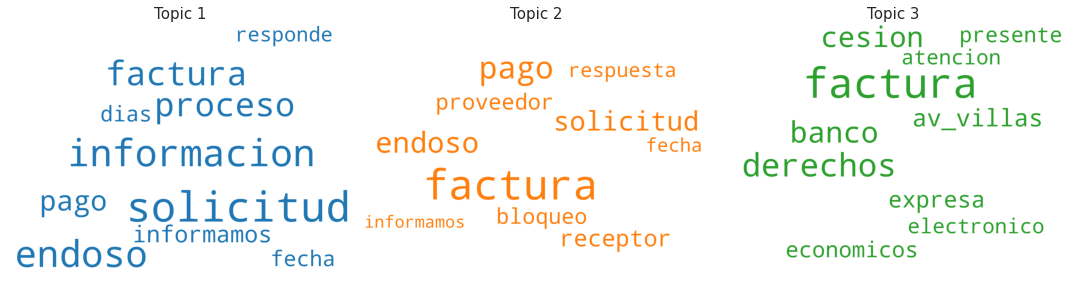

In [130]:
#@title Nubes de Palabras de los Términos clave N Principales en cada Tema
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=15))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.savefig("personal_{}_topics_{}_results.png".format(name,i+1),bbox_inches = 'tight')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [131]:
#@title Red Semántica

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[0]]])
# Funciones para bigrams, trigrams lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#Aplicacion de las respectivas funciones
#Formacion de bigramas
data_words_bigrams = make_bigrams(data_words)

#Creacion del diccionario
id2word = corpora.Dictionary(data_words_bigrams)

# Creacion del Corpus
texts = data_words_bigrams

#Frecuencia termino documento
corpus = [id2word.doc2bow(text) for text in texts]

#VEMOS CUANTOS TERMINOS ESTAN EN NUESTRO DICCIONARIO Y CUALES SON LOS MÁS FRECUENTE
word_freq = defaultdict(int)
for sent in data_words_bigrams:
    for i in sent:
        word_freq[i] += 10
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[50:100]

cores = multiprocessing.cpu_count()

##Entrenamiento del Modelo
w2v_model = Word2Vec(min_count=7, #SE CONSTRUYE EL VOCABULARIO A PARTIR DE LA FRECUENCIA DE APARICION QUE SE DEFINA AQUI
                     window=3,#SE AJUSTA EL NUMERO DE PALABRAS ATRAS Y ADELANTE DE LA PALABRA OBJETIVO PARA VECORIZARLA
                     size=30, #EL TAMANO DEL VECTOR DE CADA PALABRA
                     sample=1e-4, #-5 en principio #ESTE ES EL PARAMETRO QUE HAY QUE AJUSTAR, ES EL MAS SENSIBLE DEL MODELO
                     alpha=0.003, 
                     min_alpha=0.007, 
                     negative=10,
                     workers=cores-1)

#Construccion de vocabulario
w2v_model.build_vocab(data_words_bigrams, progress_per=10000)

#Entrenamiento del modelo
a=w2v_model.train(data_words_bigrams, total_examples=w2v_model.corpus_count, epochs=200, report_delay=1)

#Terminos similares
# w2v_model.wv.most_similar(positive=["contrasena"], topn=10)

##FUNCION PARA REDUCIR LA DIMENSION DEL ESPACIO DE PALABRAS Y PODER VISUALIZARLAS
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 30), dtype='f')
    word_labels = [word]
    color_list  = ["#25427B"] #a los colores de la campaña

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append("#33BBFF")
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append("#EBECED")
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    freq=[]
    for i in word_labels:
       freq.append(word_freq[i])

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list,'freq':freq})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': df['freq'],
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ('+ df["words"][line].title()+','+str(df['freq'][line])+')',
                 horizontalalignment='left',
                 verticalalignment='top', size='small',
                 #color=df['color'][line],
                 color='black',
                 weight='normal'
                ).set_size(11)
    
    plt.axis(emit=True)
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+30)
    plt.title('Visualización semántica para {}'.format(word.title()))

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



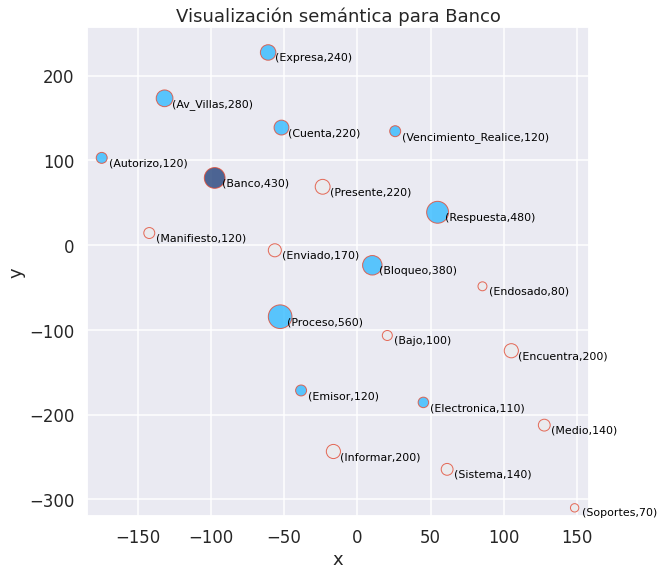

In [132]:
#@title
nombre = 'banco'#x[0]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')##

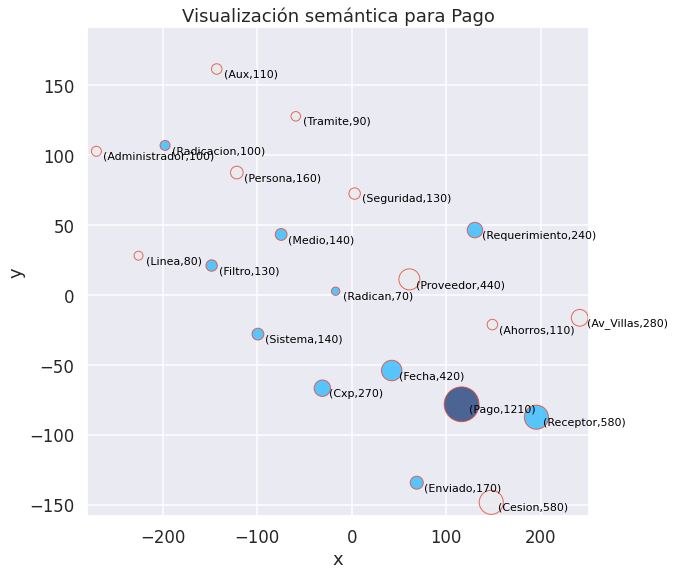

In [133]:
#@title


# tsnescatterplot(w2v_model, "activo", [t[0] for t in w2v_model.wv.most_similar(positive=["activo"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
#@title
nombre = x[1]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

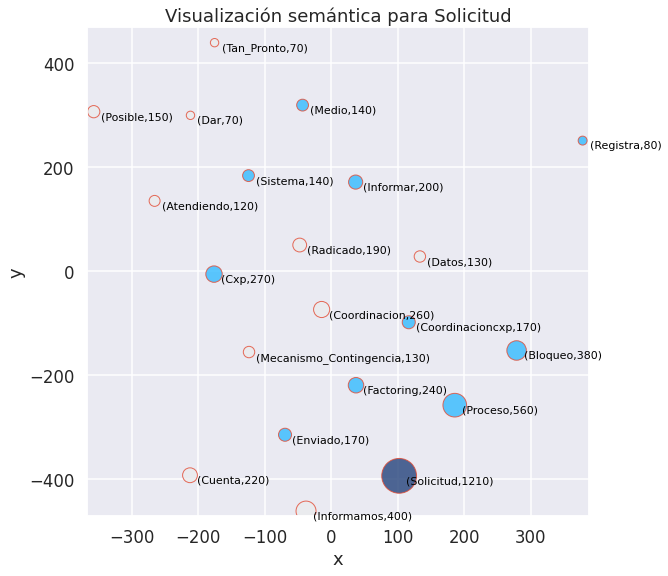

In [134]:
# @title 
#cuota se replaza por el temino clave que encontramos en las graficas de barras para 1-gramas
# tsnescatterplot(w2v_model, "confirmar", [t[0] for t in w2v_model.wv.most_similar(positive=["confirmar"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[2]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

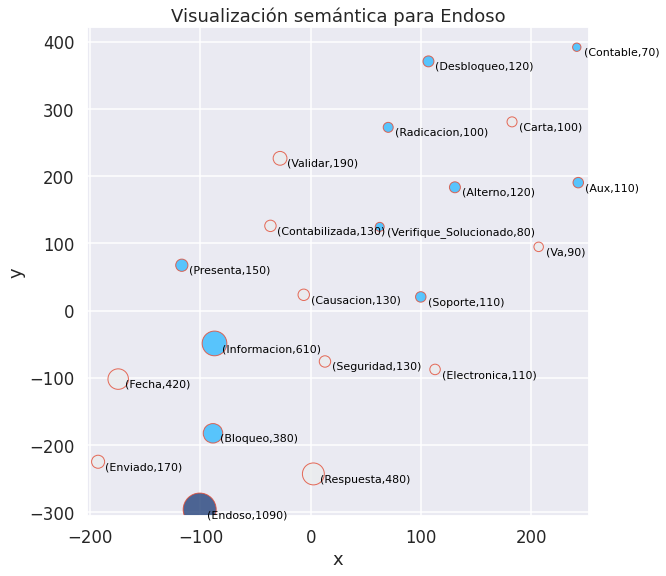

In [135]:
#@title
# tsnescatterplot(w2v_model, "actualizar", [t[0] for t in w2v_model.wv.most_similar(positive=["actualizar"], topn=20)][10:])
# plt.savefig("intereses_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
nombre = x[3]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

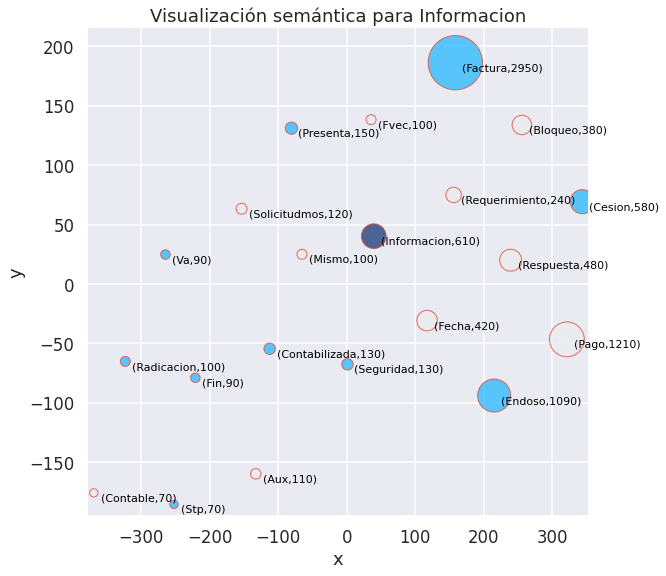

In [136]:
#@title
# tsnescatterplot(w2v_model, "codigo", [t[0] for t in w2v_model.wv.most_similar(positive=["codigo"], topn=20)][10:])
# plt.savefig("llegando_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[4]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

In [137]:
 word_vectors = w2v_model.wv
 word_vectors.save_word2vec_format('w2vecx_total_{}'.format(name))
 #Save model
from gensim.scripts.word2vec2tensor import word2vec2tensor 
word2vec2tensor('w2vecx_total_{}'.format(name), '{}_total_tensor00'.format(name))

In [138]:
#hacer version  con guines y sin guines que llos dijeron.